# EDA Assignment
5420 Anomaly Detection, Fall 2020
### Harsh Dhanuka, hd2457

### Oklahoma purchase credit card transactions

The Office of Management and Enterprise Services in the State of Oklahoma has made its [purchase credit card transactions](https://catalog.data.gov/dataset/purchase-card-pcard-fiscal-year-2014) available. This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions. 

In this assignment, you will complete the following tasks.

- Create new features and conduct exploratory data analysis. Your exploratory data analysis should be as exhaustive as possible. 
- Each feature or discussion is a new lead. Structure your EDA for different leads with sub-sections. Each sub-section will cover the following:
    - Lead: Write what you are going to do in two to three sentences.
    - Analysis: your EDA
    - Conclusion: What is the business insight? How can this feature help prediction? Write a short conclusion in the end of each sub-section. 

-  Submit in the HTML format.  

In [1]:
#install.packages("data.table")
#install.packages("DT")
#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("stringr")
#install.packages("ggplot2")
#install.packages("zscorer")
#install.packages("timeDate")

In [2]:
library(data.table)
library(DT)
library(tidyverse)
library(stringr)
library(lubridate)
library(zscorer)
library(ggplot2)
library(timeDate)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.2
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:base’:

    date




In [3]:
# Read the data set
ccard = read.csv("/Users/harshdhanuka/Desktop/Columbia Class Matter/SEM 3/5420 Anomaly Detection/Assignment 2 EDA/Part 1-b/purchase_credit_card.csv")

In [4]:
# Dimensions, rows and columns
dim(ccard)

[1] 442458     11

In [5]:
# Check if any NA's
sum(is.na(ccard))

[1] 0

In [6]:
# Check summary and sturcture of all columns
summary(ccard)
str(ccard)

   Year.Month     Agency.Number  
 Min.   :201307   Min.   : 1000  
 1st Qu.:201309   1st Qu.: 1000  
 Median :201401   Median :47700  
 Mean   :201357   Mean   :42786  
 3rd Qu.:201404   3rd Qu.:76000  
 Max.   :201406   Max.   :98000  
                                 
                                Agency.Name    
 OKLAHOMA STATE UNIVERSITY            :115995  
 UNIVERSITY OF OKLAHOMA               : 76143  
 UNIV. OF OKLA. HEALTH SCIENCES CENTER: 58247  
 DEPARTMENT OF CORRECTIONS            : 22322  
 DEPARTMENT OF TOURISM AND RECREATION : 17232  
 DEPARTMENT OF TRANSPORTATION         : 15689  
 (Other)                              :136830  
               Cardholder.Last.Name Cardholder.First.Initial
 JOURNEY HOUSE TRAVEL INC: 10137    J      : 55031          
 UNIVERSITY AMERICAN     :  7219    G      : 42251          
 JOURNEY HOUSE TRAVEL    :  4693    D      : 38120          
 Heusel                  :  4212    M      : 35352          
 Hines                   :  3423    S  

'data.frame':	442458 obs. of  11 variables:
 $ Year.Month                  : int  201307 201307 201307 201307 201307 201307 201307 201307 201307 201307 ...
 $ Agency.Number               : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Agency.Name                 : Factor w/ 124 levels "`DEPARTMENT OF EDUCATION",..: 86 86 86 86 86 86 86 86 86 86 ...
 $ Cardholder.Last.Name        : Factor w/ 3911 levels "15000","24100",..: 2283 2283 2285 2285 2299 2299 2301 2301 2324 2334 ...
 $ Cardholder.First.Initial    : Factor w/ 38 levels "1","2","4","5",..: 11 11 19 32 23 23 10 10 12 21 ...
 $ Description                 : Factor w/ 88749 levels " ","                     PCE",..: 40671 68442 40671 40671 42275 40671 40671 40671 40671 18248 ...
 $ Amount                      : num  890 369 165.8 96.4 126 ...
 $ Vendor                      : Factor w/ 86729 levels "#1 PARTY SUPPLIES",..: 56142 68343 67786 85049 73992 52646 85049 26407 79732 20507 ...
 $ Transaction.Date            : 

In [7]:
# Rename columns to suitabe names
colnames(ccard) = c('Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Merchant_Name', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category')

In [8]:
# Verify the new column names
head(ccard, 1)

Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category
201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS


### Some observations from eye-balling the given data

1. `Year_Month` is a 6 digit integer containing the year and month of the transaction
2. `Agency_Number` is an integer with many different values. but should rather be a factor level value.
3. `Description` has some unsual/unexplained values such as '0000000000'
4. `Amount` has negative values, which can misrepresented values or could be refunds or reverse transactions.
5. `Transaction_Date` and `Posted_Date` needs to be converted to Date/Time format. Here, all the times are 12:00  AM (Verify it)

#### Now, I will do Data Cleanup based on the above observations.

# A. Initial Data Cleanup

### 1. Converts a 6 digit integer of `Year_Month` to date/time format

In [9]:
ccard = transform(ccard, Year = substr(Year_Month, 1, 4), Month = substr(Year_Month, 5, 6))

In [10]:
# Remove unwanted column
ccard = ccard[,-1]
head(ccard,1)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,07


### 2. Convert `Transaction_Date` and `Posted_Date` to date/time format, make new columns

This will help to make the analysis easier, as integer dates are no good. Also, I will evaluate the time columns to see the exact time stamps for each transaction.

In [11]:
Transaciton_Date =
  str_split(ccard$Transaction_Date,
            pattern = " ",
            simplify = TRUE)

ccard$Transaction_Date = mdy(Transaciton_Date[, 1])
ccard$Transaction_Time = Transaciton_Date[, 2]

In [12]:
Posted_Date =
  str_split(ccard$Posted_Date,
            pattern = " ",
            simplify = TRUE)

ccard$Posted_Date = mdy(Posted_Date[, 1])
ccard$Posted_Time = Posted_Date[, 2]

In [13]:
head(ccard,1)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Time,Posted_Time
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,07,12:00:00,12:00:00


In [14]:
# Verify the transformation to date
class(ccard$Transaction_Date)
class(ccard$Posted_Date)

[1] "Date"

[1] "Date"

### 3. Check the two `Time` columns, if they have same time value throughout, I can remove them.
If both the time columns ahev the exact same constant throhghout, they will not help at all in any modelling. So, I will remove both of them from the dataset. Constants do not help in Analysis.

In this case, both time columns are exactly same, can remove them from the data set.

In [15]:
str(as.factor(ccard$Transaction_Time))
str(as.factor(ccard$Transaction_Time))

 Factor w/ 1 level "12:00:00": 1 1 1 1 1 1 1 1 1 1 ...
 Factor w/ 1 level "12:00:00": 1 1 1 1 1 1 1 1 1 1 ...


In [16]:
# Remove these two columns, as they are constant throughout, they are factors with only 1 level. 
ccard = ccard[,-c(13:14)]

In [17]:
#Verify
head(ccard,1)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,07


# B. Exploratory Data Analysis (EDA)

Here, I will evaluate all the features, and try to understand the distributions, statistical factors of the features and the correlations (if any):
1. Check distribution of X
2. Check distribution of X by categorical variable Y
3. Check relation between 2 or 3 variables

### 1. Number of transactions by the Agency Number and/or Agency Name

These two variables correlate to each other and have the same utility, so I will use only 'one of them' to do the analysis.

### Find the total number of transactions under each Agency Name

This will give the distribution of the number of transactions carried out by agencies over the entire time period.

`summarise()` ungrouping output (override with `.groups` argument)



Agency_Name,Transactions_Count
OKLAHOMA STATE UNIVERSITY,115995
UNIVERSITY OF OKLAHOMA,76143


Agency_Name,Transactions_Count
OFFICE OF EDUC. QUALITY & ACCOUNTABILITY,1
WORKER'S COMP. COMMISSION,1


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     1.0    130.5    383.0   3568.2   1360.2 115995.0 

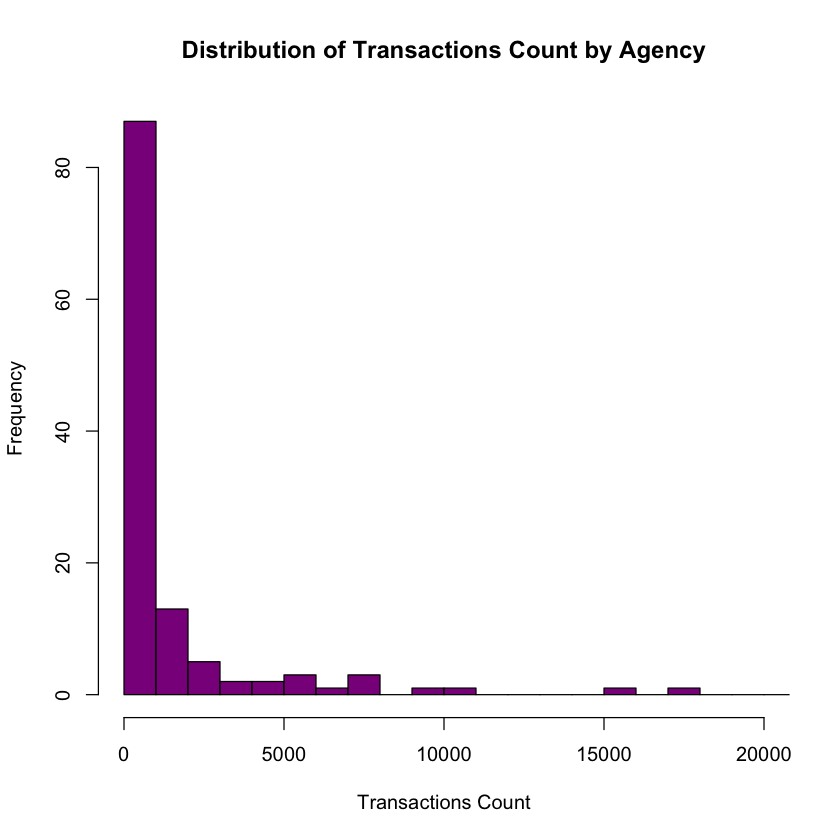

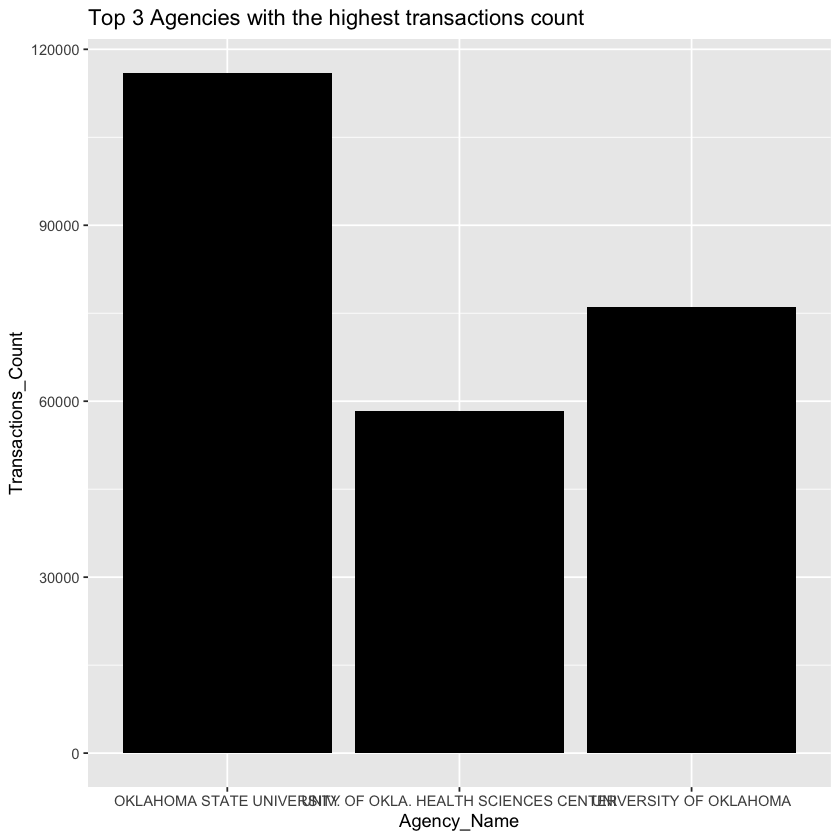

In [18]:
Transactions_by_Agency = ccard %>% group_by(Agency_Name) %>% 
                        summarize(Transactions_Count = n()) %>% arrange(desc(Transactions_Count)) %>% ungroup()

# Display the top and bottom Agency names with the number of users
head(Transactions_by_Agency,2)
tail(Transactions_by_Agency,2)

# Check  stats
summary(Transactions_by_Agency$Transactions_Count)

Transactions_by_Agency = data.frame(Transactions_by_Agency)

# See distribution of the Agency Wise Transaction Count
hist(Transactions_by_Agency$Transactions_Count, 
     main = "Distribution of Transactions Count by Agency", 
     xlab = "Transactions Count",
     breaks =100, col = "darkmagenta", xlim = c(0,20000)
    )

mask1 = Transactions_by_Agency[Transactions_by_Agency$Transactions_Count > 50000, ]
ggplot(data = mask1, aes(x = Agency_Name, y = Transactions_Count)) + geom_bar(stat = 'identity', fill = "black") + ggtitle("Top 3 Agencies with the highest transactions count")

#### Observation: 
Clearly, most of the agencies have less than 10,000 total transactions, with the majority being less than 3568.

### 2. Number of Unique Agencies

See the unique agencies which have cardholders

In [19]:
unique_agencies = length(unique(ccard$Agency_Name))
unique_agencies

[1] 124

In [20]:
paste("There are ", unique_agencies, "unique agencies in the dataset")

[1] "There are  124 unique agencies in the dataset"

#### Observation: 
There are 124 unique Agency names in the dataset.

### 3. Number of transactions by each cardholder in each Agency

This gives an idea about the highest and the lowest number of transactions done by all users, and check the distribution.

This will also give the distribution of the number of transactions carried out by agencies, group as per each cardholder, over the entire time period.

`summarise()` regrouping output by 'Agency_Name' (override with `.groups` argument)



Agency_Name,Cardholder_Last_Name,transactions_count
UNIVERSITY OF OKLAHOMA,JOURNEY HOUSE TRAVEL INC,10137
UNIVERSITY OF OKLAHOMA,UNIVERSITY AMERICAN,7219


Agency_Name,Cardholder_Last_Name,transactions_count
UNIVERSITY OF OKLAHOMA,VOELLER,1
WORKER'S COMP. COMMISSION,Twyman,1


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00    12.00    36.00    90.09    95.00 10137.00 

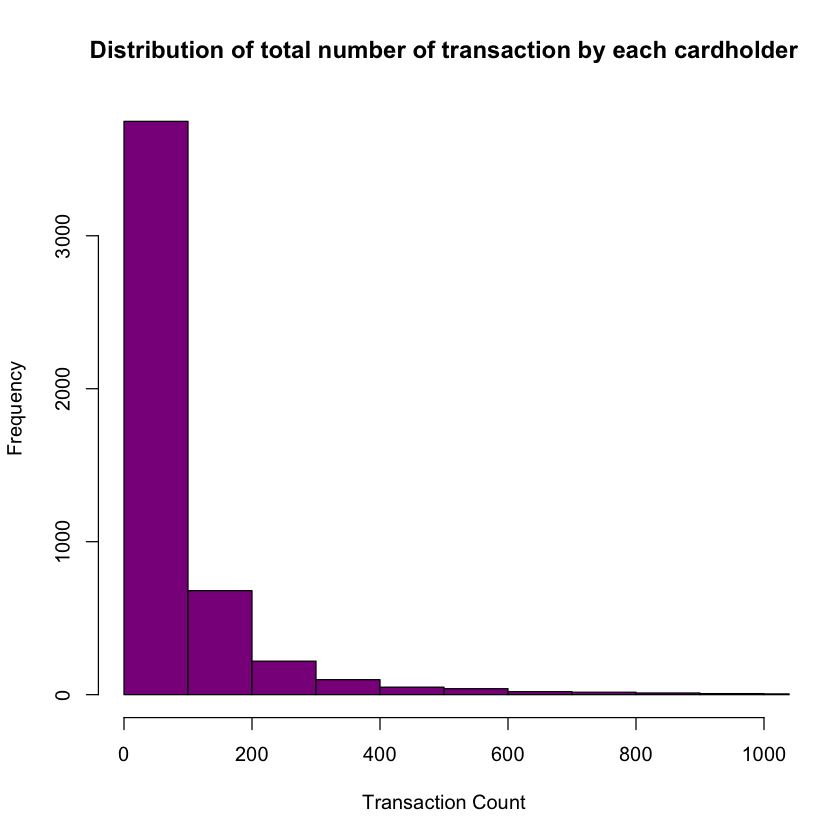

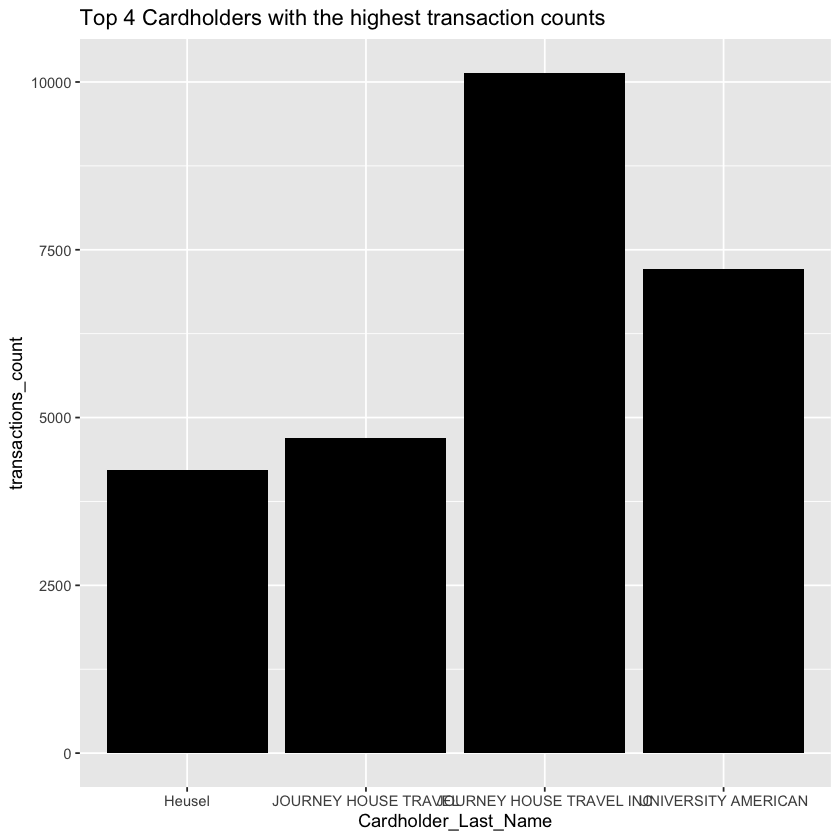

In [21]:
users_in_agency = ccard %>% group_by(Agency_Name, Cardholder_Last_Name) %>% 
                        summarize(transactions_count = n()) %>% arrange(desc(transactions_count)) %>% ungroup()

head(users_in_agency,2)
tail(users_in_agency,2)

# Stats
summary(users_in_agency$transactions_count)

users_in_agency = data.frame(users_in_agency)
hist(users_in_agency$transactions_count, 
     breaks = 100, main = "Distribution of total number of transaction by each cardholder",
    col = "darkmagenta", xlab = "Transaction Count", xlim = c(0,1000))

mask2 = users_in_agency[users_in_agency$transactions_count > 4000,c(2,3)]
ggplot(data = mask2, aes(x = Cardholder_Last_Name, y = transactions_count)) + geom_bar(stat = 'identity', fill = "black") + ggtitle("Top 4 Cardholders with the highest transaction counts")

#### Observation:
Most of the users have less than a total of 90 transactions, with the majority being less than 36.

#### Important Observation: 
Journey Travel House has two different names. We need to check if it is the same, and remove duplicates.

In [22]:
paste("The cardholder with the higest number of transactions is G Journey House Travel Inc with 10,137 transactions.")

[1] "The cardholder with the higest number of transactions is G Journey House Travel Inc with 10,137 transactions."

### 4. Number of Unique Merchant Names

I will find the unique merchants that all the cardholers have interacted with.

In [23]:
unique_merchants = length(unique(ccard$Merchant_Name))
unique_merchants

[1] 86729

In [24]:
paste("There are ", unique_merchants, "unique merchants in the dataset")

[1] "There are  86729 unique merchants in the dataset"

#### Observation: 
There are 86729 unique merchants in the dataset.

### 5. Popular Merchants

See the merchants who have the most transactions.

This will give the distribution of the merchants, who have the highest number of transactions, over the entire time period.

`summarise()` ungrouping output (override with `.groups` argument)



Merchant_Name,transactions_count
STAPLES,14842
AMAZON MKTPLACE PMTS,12197


Merchant_Name,transactions_count
ZUMA OFFICE SUPPLY,1
ZZOUNDS.COM,1


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.000     1.000     1.000     5.102     1.000 14842.000 

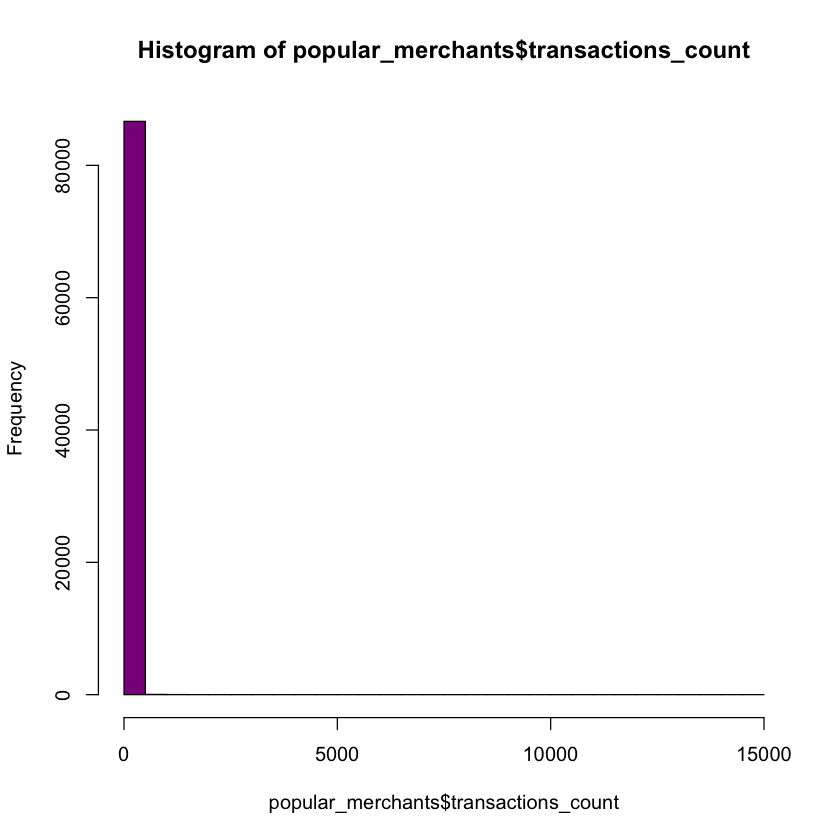

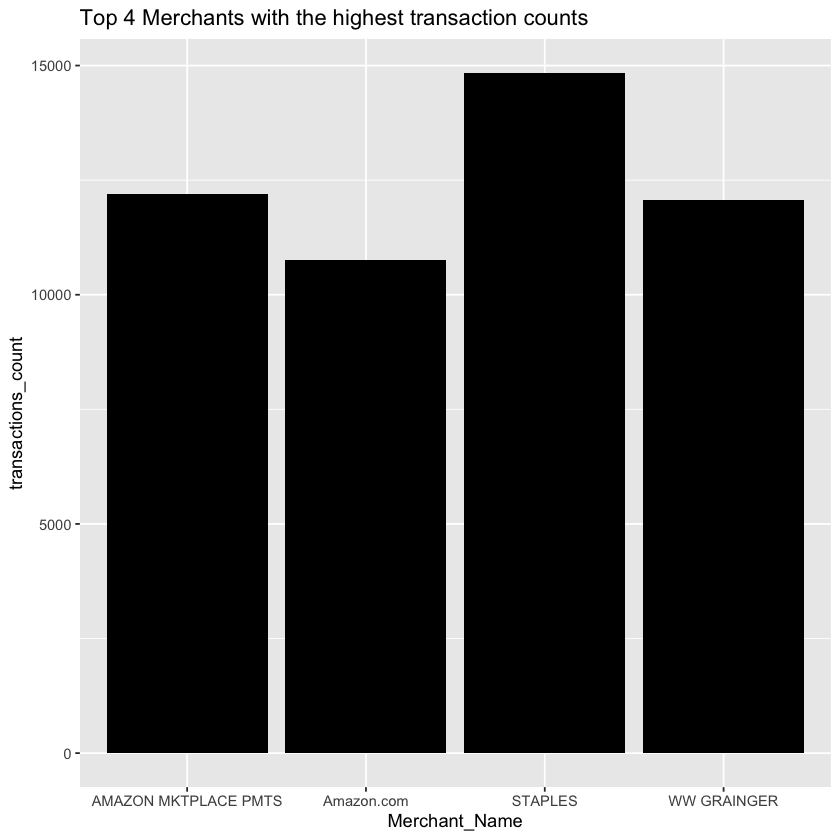

In [25]:
popular_merchants = ccard %>% group_by(Merchant_Name) %>% 
                        summarize(transactions_count = n()) %>% arrange(desc(transactions_count)) %>% ungroup()

head(popular_merchants, 2)
tail(popular_merchants,2)

# Stats
summary(popular_merchants$transactions_count)

hist(popular_merchants$transactions_count, breaks = 50, col = "darkmagenta")

mask3 = popular_merchants[popular_merchants$transactions_count > 5000, ]
ggplot(data = mask3, aes(x = Merchant_Name, y = transactions_count)) + geom_bar(stat = 'identity', fill = "black") + ggtitle("Top 4 Merchants with the highest transaction counts")

#### Observation:
The most popular Merchant is 'Staples' with 14,842 transactions.

### 6. Number of Unique Merchant Categories

In [26]:
unique_merchants_cat = length(unique(ccard$Merchant_Category))
unique_merchants_cat

[1] 435

In [27]:
paste("There are ", unique_merchants_cat, "unique merchant categories in the dataset")

[1] "There are  435 unique merchant categories in the dataset"

#### Observation: 
There are 435 unique merchant categories in the dataset.

### 7. Popular Merchant Categories

See the merchant categories who have the most transactions.

This will give the distribution of the merchant categories, who have the highest number of transactions, over the entire time period.

`summarise()` ungrouping output (override with `.groups` argument)



Merchant_Category,transactions_count
"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",24860
BOOK STORES,21981


Merchant_Category,transactions_count
WALDORF,1
WYNN LAS VEGAS,1


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       8      51    1017     527   24860 

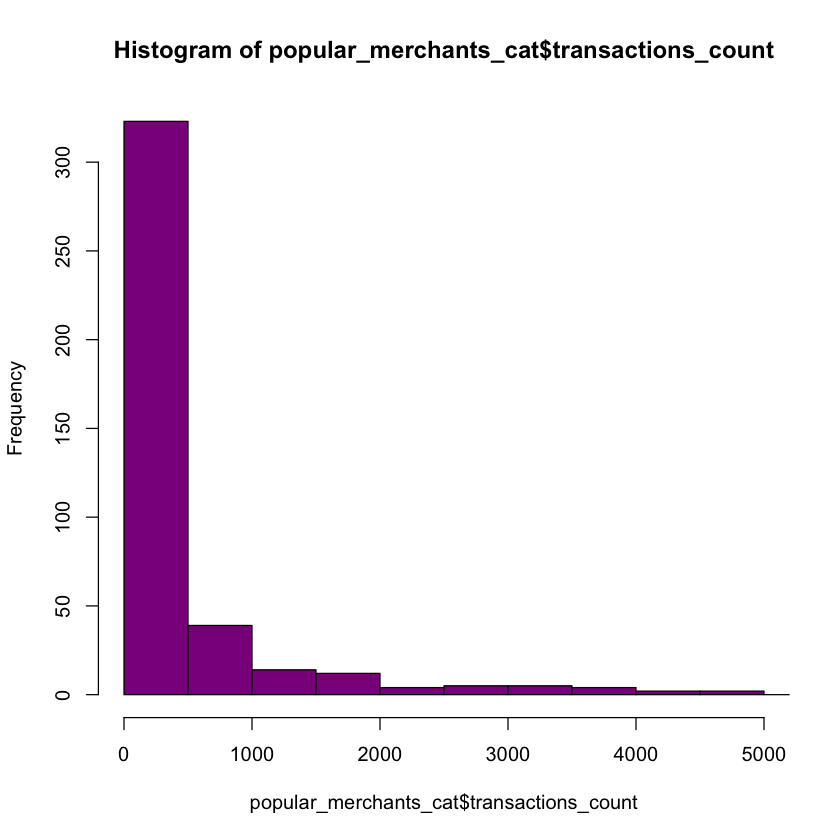

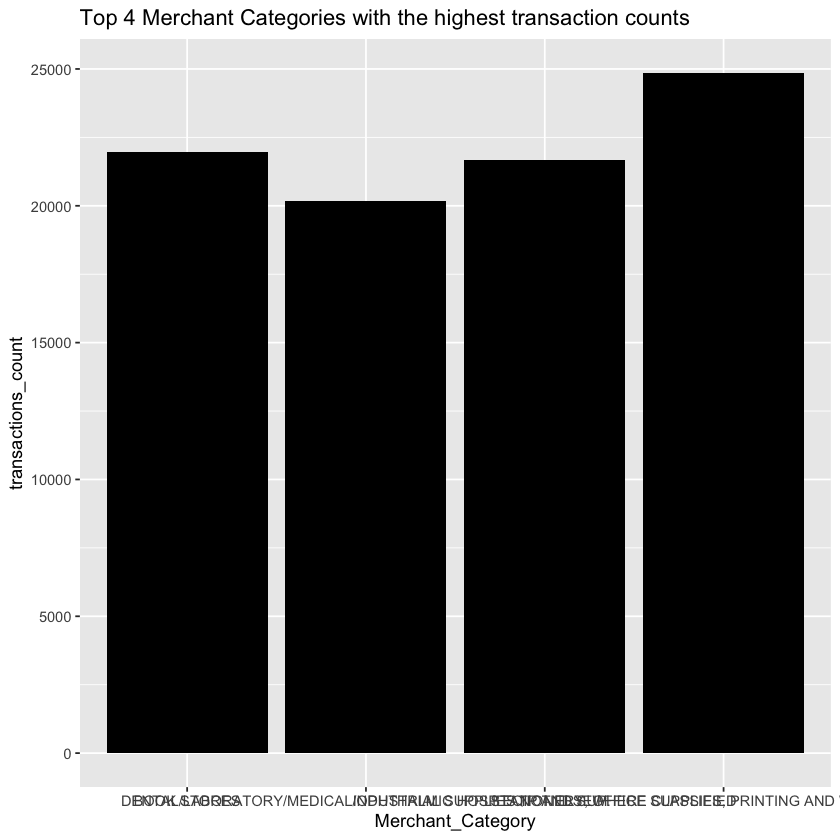

In [28]:
popular_merchants_cat = ccard %>% group_by(Merchant_Category) %>% 
                        summarize(transactions_count = n()) %>% arrange(desc(transactions_count)) %>% ungroup()

head(popular_merchants_cat,2)
tail(popular_merchants_cat,2)

# Stats
summary(popular_merchants_cat$transactions_count)

hist(popular_merchants_cat$transactions_count, breaks = 50, col = "darkmagenta", xlim = c(0,5000))

mask4 = popular_merchants_cat[popular_merchants_cat$transactions_count > 20000, ]
ggplot(data = mask4, aes(x = Merchant_Category, y = transactions_count)) + geom_bar(stat = 'identity', fill = "black") + ggtitle("Top 4 Merchant Categories with the highest transaction counts")

#### Observation:
The most popular Merchant Category is 'Stationary, Office Supplies, Printing and Writing Paper' with 24,860 transactions.

### 8. Popular Merchants by the Merchant Category

I expect to receive similar results as above, but will still verify it.

In [29]:
popular_merchants_by_cat = ccard %>% group_by(Merchant_Category, Merchant_Name) %>% 
                        summarize(transactions_count = n()) %>% arrange(desc(transactions_count)) %>% ungroup()

head(popular_merchants_by_cat,2)
tail(popular_merchants_by_cat,2)

`summarise()` regrouping output by 'Merchant_Category' (override with `.groups` argument)



Merchant_Category,Merchant_Name,transactions_count
"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER",STAPLES,14842
BOOK STORES,AMAZON MKTPLACE PMTS,12197


Merchant_Category,Merchant_Name,transactions_count
WYNDHAM HOTELS,WYNDHAM SAN DIEGO BAYSIDE,1
WYNN LAS VEGAS,WYNN LAS VEGAS HOTEL,1


#### Observation:

The results here will be more or less similar to the Popular Merchants analysis I did above.

### 9. Number of cardholders or users under each Agency by Last Name

See the number of accounts/users under each agency.

This will give the distribution of the total number of cardholders under each different agency, over the entire time period.

`summarise()` ungrouping output (override with `.groups` argument)



Agency_Name,Number_of_Cardholders
OKLAHOMA STATE UNIVERSITY,1622
UNIVERSITY OF OKLAHOMA,751


Agency_Name,Number_of_Cardholders
TOBACCO SETTLEMENT ENDMT TRUST,1
WORKER'S COMP. COMMISSION,1


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00    4.00   39.60   15.75 1622.00 

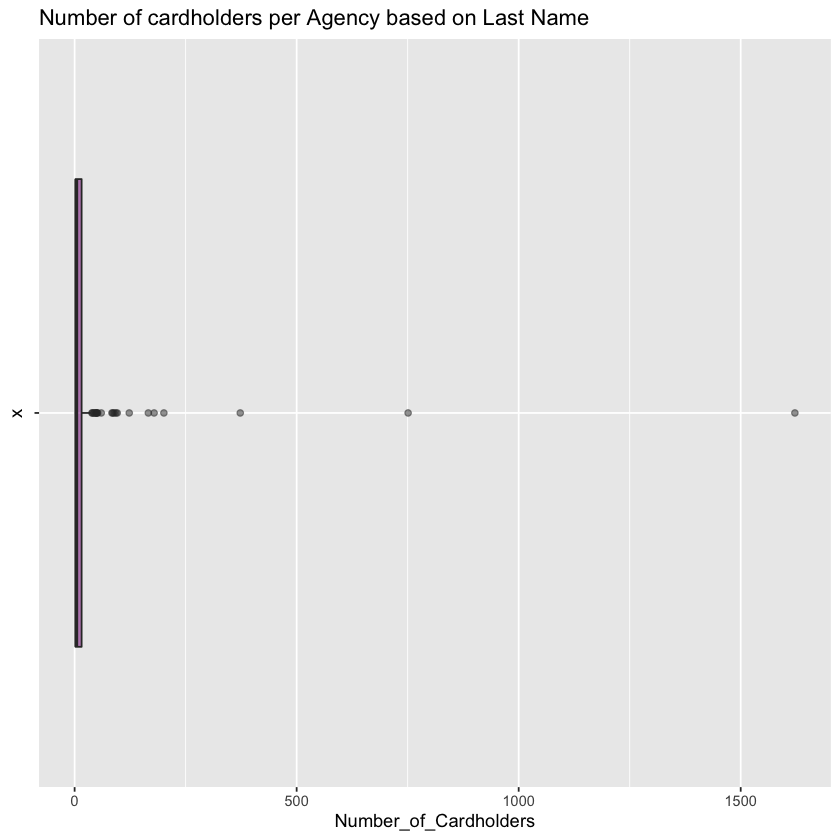

In [30]:
cardholder_count_by_agency = ccard %>% group_by(Agency_Name) %>% 
                    summarize(Number_of_Cardholders = length(unique(Cardholder_Last_Name))) %>%
                    arrange(desc(Number_of_Cardholders))

head(cardholder_count_by_agency,2)
tail(cardholder_count_by_agency,2)

# Stats
summary(cardholder_count_by_agency$Number_of_Cardholders)

ggplot(data = cardholder_count_by_agency, aes(x = '', y = `Number_of_Cardholders`)) + 
  geom_boxplot(fill = "darkmagenta", alpha = .5) + 
  ggtitle('Number of cardholders per Agency based on Last Name') + coord_flip()



#### Observation: 
Most of the Agencies have less than 50 cardholders, with the majority being less than 4.

### 10. Distribution of Amount

This will give the distribution of the transaction amounts, by all users, over the entire time period.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 -42863.0      30.9     104.9     425.0     345.0 1903858.4 

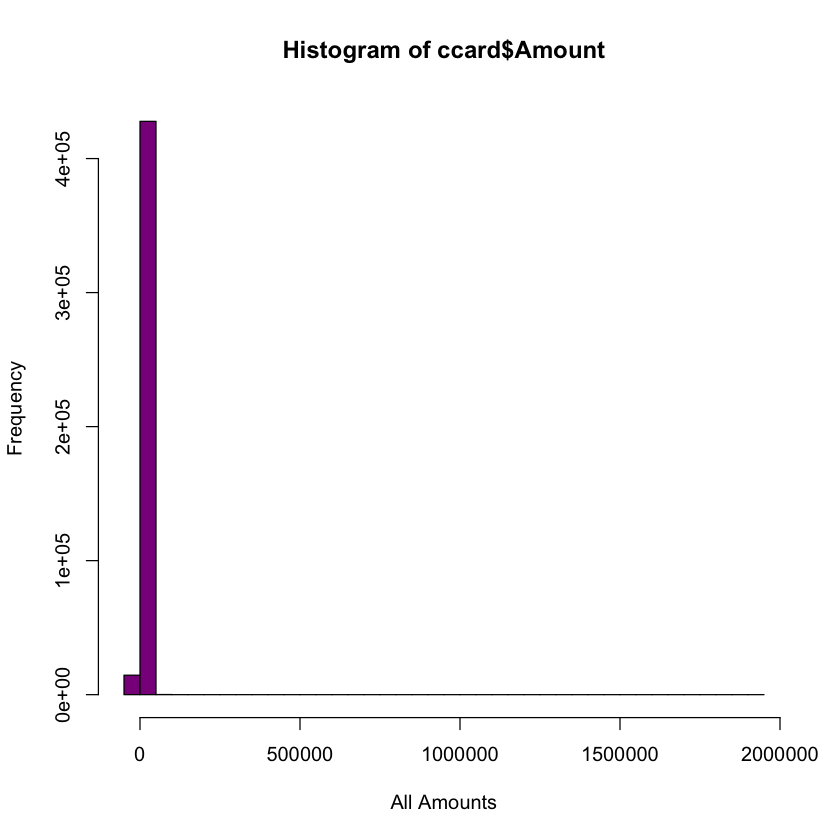

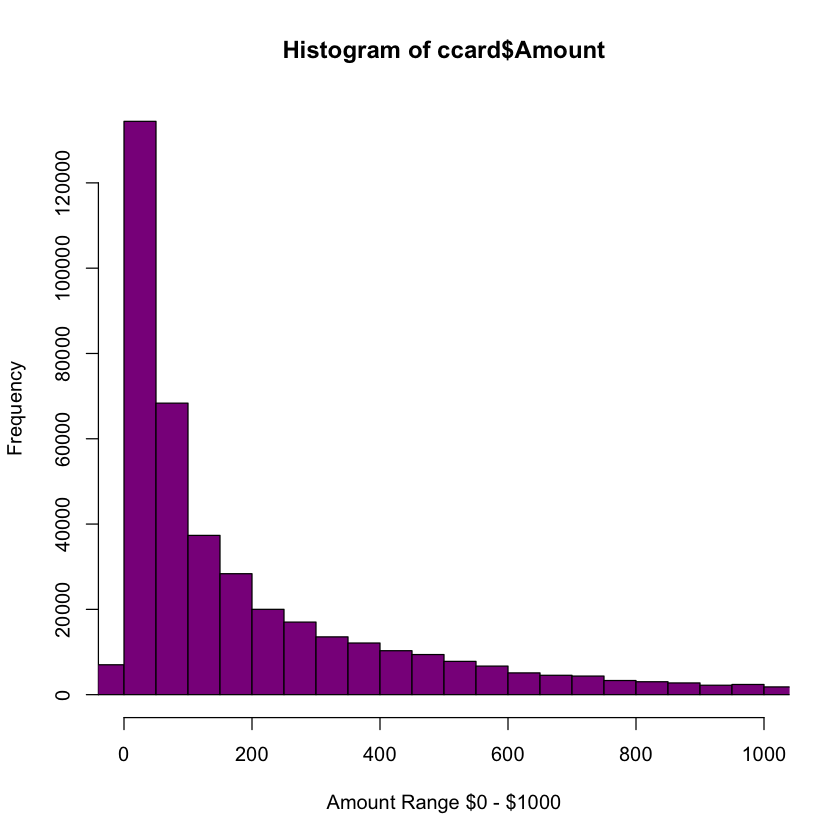

In [31]:
#Stats
summary(ccard$Amount)

hist(ccard$Amount, breaks = 50, col = "darkmagenta", xlab = "All Amounts")
hist(ccard$Amount, breaks = 50000, xlim = c(0,1000), col = "darkmagenta", xlab = "Amount Range $0 - $1000")

#### Observation:
Most transactions are lower than USD 1000, with the majority being around USD 150

### 11. Distribution of Amount by Agency

This will give the distribution of the amounts spent, by the Agency, over the entire time period.

`summarise()` ungrouping output (override with `.groups` argument)



Agency_Name,Amount
OKLAHOMA STATE UNIVERSITY,33778840
UNIVERSITY OF OKLAHOMA,24886383


Agency_Name,Amount
WORKER'S COMP. COMMISSION,60.00
OFFICE OF EDUC. QUALITY & ACCOUNTABILITY,35.58


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
      36    24948   125616  1516458   424601 33778840 

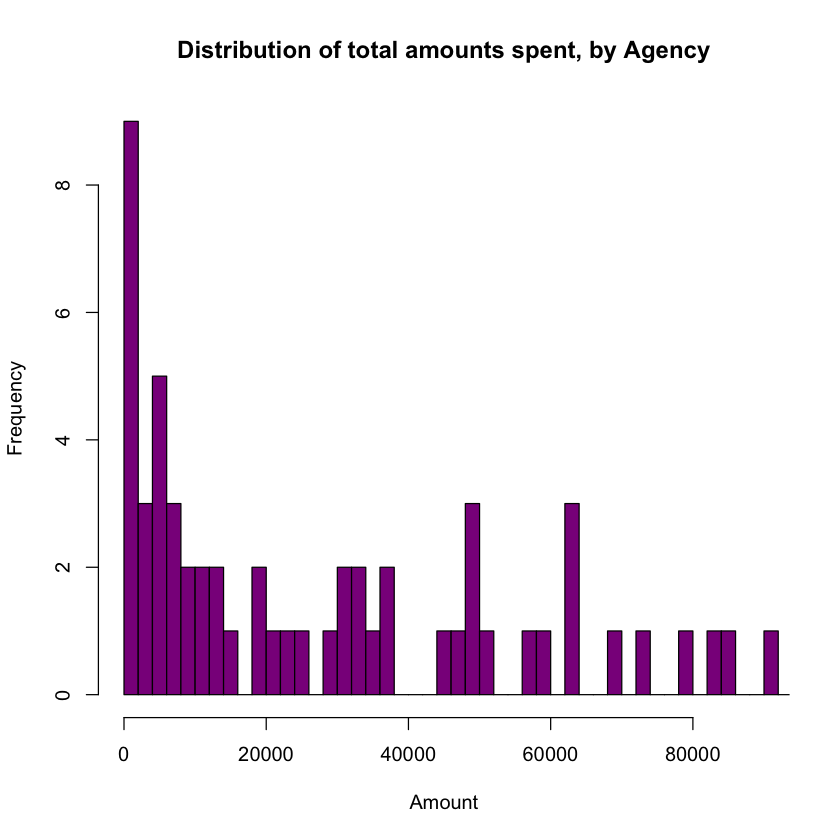

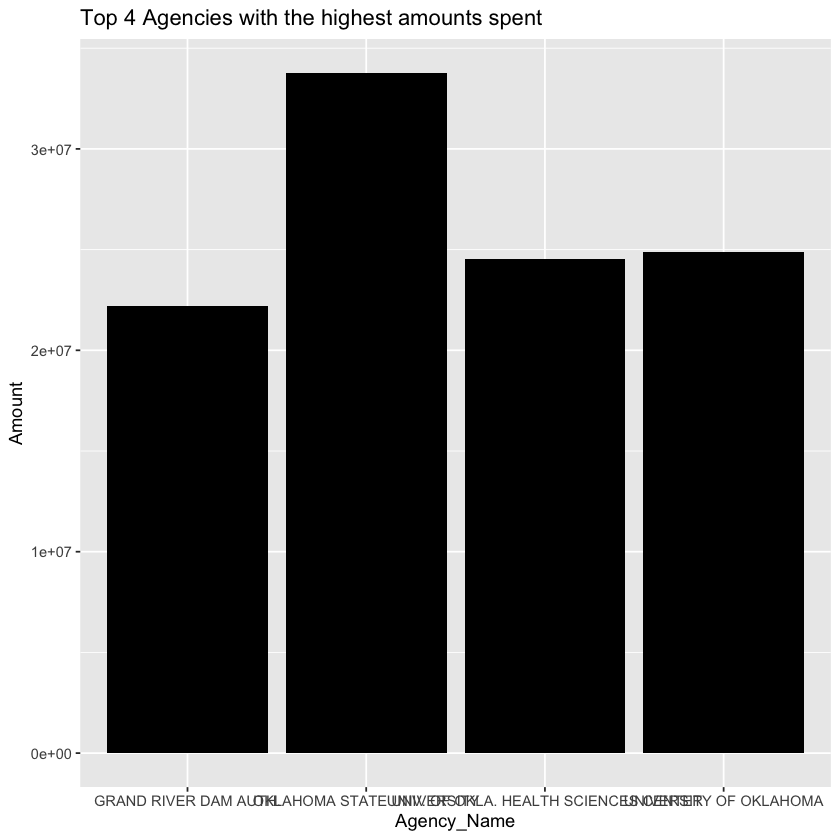

In [32]:
amount_by_agency = ccard %>% group_by(Agency_Name) %>% 
                        summarize(Amount = sum(Amount)) %>% arrange(desc(Amount)) %>% ungroup()

head(amount_by_agency,2)
tail(amount_by_agency,2)

# Stats
summary(amount_by_agency$Amount)

amount_by_agency = data.frame(amount_by_agency)
                                  
hist(amount_by_agency$Amount, 
     breaks = 20000, main = "Distribution of total amounts spent, by Agency",
    col = "darkmagenta", xlab = "Amount", xlim = c(0,90000))

mask5 = amount_by_agency[amount_by_agency$Amount > 20000000, ]
ggplot(data = mask5, aes(x = Agency_Name, y = Amount)) + geom_bar(stat = 'identity', fill = "black") + ggtitle("Top 4 Agencies with the highest amounts spent")

#### Observation: 
The highest spender is 'Oklahoma State University', amount of USD 33,778,840.

### 12. Distribution of Amount by Merchant Name

This will give the distribution of the amounts spent, for the different merchant, over the entire time period.

`summarise()` ungrouping output (override with `.groups` argument)



Merchant_Name,Amount
WW GRAINGER,5089417
PAYMENT ADJUSTMENT,4061761


Merchant_Name,Amount
CLAIM ADJ/AMAZON.COM,-4907.22
CLAIM ADJ/VERACARTE,-9141.79


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -9142      29     227    2168     602 5089417 

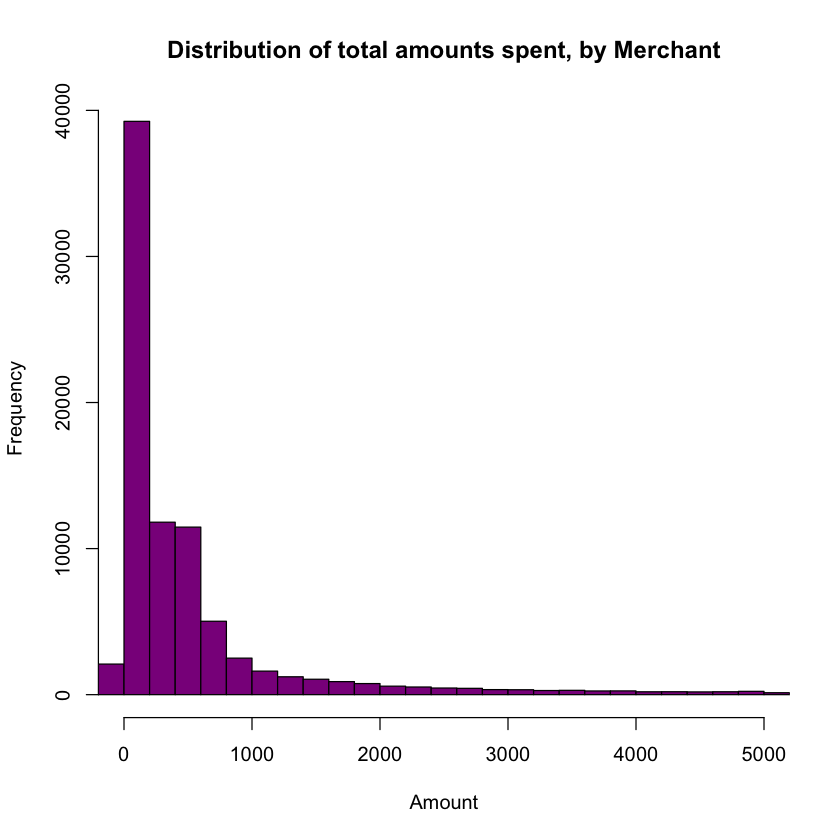

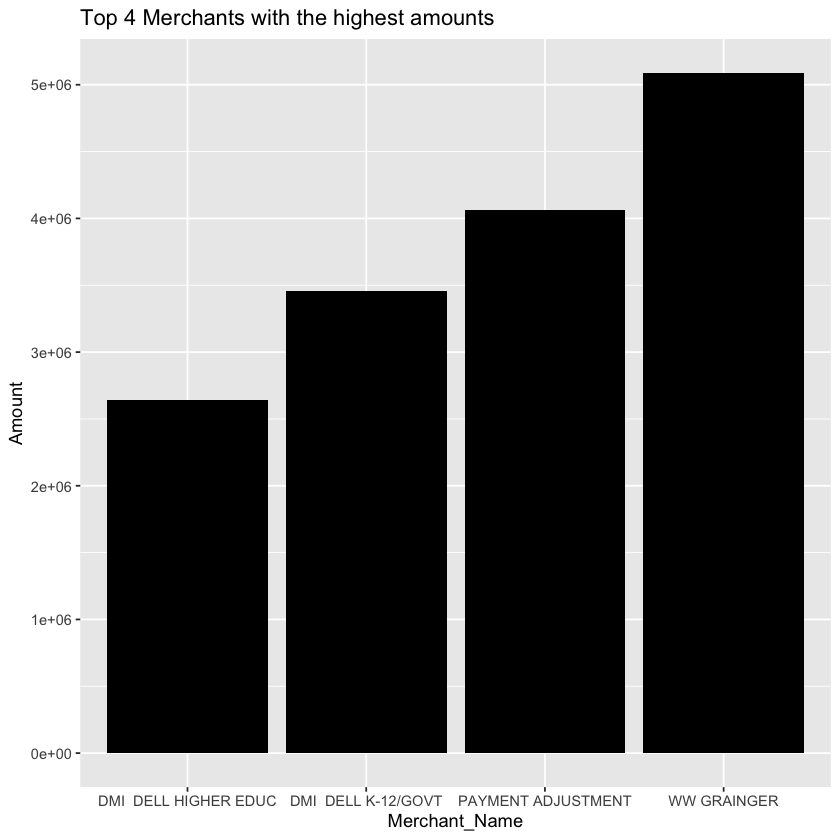

In [33]:
amount_by_merc = ccard %>% group_by(Merchant_Name) %>% 
                        summarize(Amount = sum(Amount)) %>% arrange(desc(Amount)) %>% ungroup()

head(amount_by_merc,2)
tail(amount_by_merc,2)

# Stats
summary(amount_by_merc$Amount)

amount_by_merc = data.frame(amount_by_merc)
                                  
hist(amount_by_merc$Amount, 
     breaks = 20000, main = "Distribution of total amounts spent, by Merchant",
    col = "darkmagenta", xlab = "Amount", xlim = c(0,5000))

mask6 = amount_by_merc[amount_by_merc$Amount >2500000, ]
ggplot(data = mask6, aes(x = Merchant_Name, y = Amount)) + geom_bar(stat = 'identity', fill = "black") + ggtitle("Top 4 Merchants with the highest amounts")

#### Observation:
The highest revenue given merchant is WW Grainger, with amount USD 5,089,417.

### 13. Distribution of Amount by Agency Name (bar plot)

In addition to the distribution I showed above, I am using this following example from the professors guide. 
This graph depicts better the total amounts spent by agencies.

`summarise()` ungrouping output (override with `.groups` argument)



Agency_Name_ind,count,amount,percent,mean,min,max
1_OKLAHOMA STATE UNIVERSITY,115995,33778840,0.1796358,291.2094,-6266.53,27967.38
2_UNIVERSITY OF OKLAHOMA,76143,24886383,0.1323457,326.8374,-41740.00,114203.17


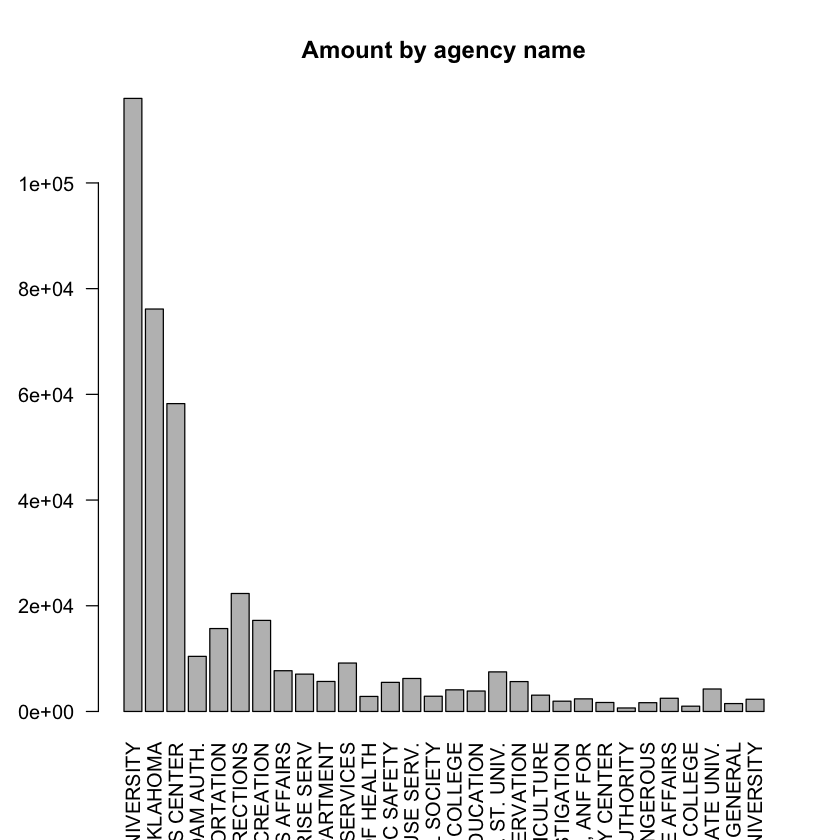

In [34]:
# Simple Bar Plot 
stat_by_agency <- ccard %>% group_by(Agency_Name) %>%
    summarise(count = n(),
              amount = sum(Amount),
              mean = mean(Amount),
              min = min(Amount),
              max = max(Amount)
             ) %>%
    arrange(desc(amount)) %>% ungroup() 

stat_by_agency <- stat_by_agency %>%
    mutate(row = rep(1:nrow(stat_by_agency)),
          Agency_Name_ind = paste(row,Agency_Name,sep="_"),
          percent = amount/sum(amount)) %>%
    select(Agency_Name_ind,count, amount, percent,mean, min, max)

head(stat_by_agency,2)
temp <-stat_by_agency[1:30,]
#setwd("/Users/user/Downloads")
barplot(temp$count,names.arg=temp$Agency_Name_ind,
main="Amount by agency name",las=2       )

# C. Creating New Features

Initial creation of basic useful features

### `Feature 1`

### Make a new Transaction_Week column from the Transaction_Date column

This will be very useful to  aggregate the transaction based on the week of the year, the month column is already present for us, which can be used in calculation for 4 weeks. 

In [35]:
ccard["Transaction_Week"] = week(ccard$Transaction_Date)
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,07,31
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,07,31


### `Feature 2`

### Z score of transaction amount from average, by Agency

A Z-score is a numerical measurement used in statistics of a value's relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

A Z score of higher than 3% occurs less than 1% of the time, and they should be investigated. The data suggest that there's a z Score of 176, which is exceptionally high. The data isnormally shaped like a normal distribution curve. 

In [36]:
# Create a function to calcuate the z-score for a data set

z_score = function(ccard) {
  ccard_mean = mean(ccard)
  ccard_std = sd(ccard)
  z_score = ((ccard - ccard_mean) / ccard_std)
  
  return(round(z_score,3))
}

str(z_score)

function (ccard)  
 - attr(*, "srcref")= 'srcref' int [1:8] 3 11 9 1 11 1 3 9
  ..- attr(*, "srcfile")=Classes 'srcfilecopy', 'srcfile' <environment: 0x7f896a382390> 


In [37]:
agency_zscore = ccard %>% group_by(Agency_Name) %>% summarize(Amount_Z_Score_Agency = z_score(Amount))

head(agency_zscore,2)

#Check
sum(is.na(agency_zscore))

`summarise()` regrouping output by 'Agency_Name' (override with `.groups` argument)



Agency_Name,Amount_Z_Score_Agency
`DEPARTMENT OF EDUCATION,0.032
`DEPARTMENT OF EDUCATION,-0.443


[1] 4

In [38]:
# Replace NA's with 0

agency_zscore[is.na(agency_zscore)] = 0

sum(is.na(agency_zscore))

[1] 0

### `Feature 3`

### Day of Week

Find the days of the week from the Transaction Date Column

In [39]:
ccard["Day_of_Week"] = weekdays(ccard$Transaction_Date)
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,07,31,Tuesday
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,07,31,Tuesday


### `Feature 4`

### Weekdays

Find whether the day is a weekday or not

In [40]:
ccard["Weekday"] = weekdays(ccard$Transaction_Date)
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week,Weekday
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,07,31,Tuesday,Tuesday
1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,07,31,Tuesday,Tuesday


In [41]:
sum(is.na(ccard$Weekday))

# There are no weekend transactions

[1] 0

### Now, I will be creating features under three major heads of the RFM method:
- Recency
- Frequency
- Monetary

## 1. Recency

### `Feature 5`

### Time (days) since last transaction by Agency

I will check when the agency last used their card: 

1)	Agencies with a short time lag could indicate an active purchaser, and with that level of activity, it increases the likelihood of their card being stolen and used for fraud  

2)	  Highlight fraud for lesser utilized cards. If a card is rarely used and suddenly has many transactions in short lag, it could be a cause for further exploration.

In [42]:
ccard = ccard %>% group_by(Agency_Name) %>% arrange(Transaction_Date, Agency_Name) %>%
                    mutate(Days_Since_Last_Ag = Transaction_Date - lag(Transaction_Date))

head(ccard, 2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,2013,10,16,Wednesday,Wednesday,NA days
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,2013,07,18,Tuesday,Tuesday,NA days


In [43]:
# it generates NA's for those values, who do not have a preceding transaction record.
sum(is.na(ccard))

[1] 124

### `Feature 6`

### Time (days) since last transaction by individual Cardholder

I will check when the cardholder last used their card: 

1)	Agencies with a short time lag could indicate an active purchaser, and with that level of activity, it increases the likelihood of their card being stolen and used for fraud  

2)	  Highlight fraud for lesser utilized cards. If a card is rarely used and suddenly has many transactions in short lag, it could be a cause for further exploration.

In [44]:
ccard = ccard %>% group_by(Cardholder_Last_Name) %>% arrange(Transaction_Date, Cardholder_Last_Name) %>%
                    mutate(Days_Since_Last_CH = Transaction_Date - lag(Transaction_Date))

head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,2013,10,16,Wednesday,Wednesday,NA days,NA days
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,2013,07,18,Tuesday,Tuesday,NA days,NA days


In [45]:
sum(is.na(ccard))

# it generates NA's for those values, who do not have a preceding transaction record, which is fine.

[1] 4035

### `Feature 7`

### Time (days) since last transaction by Merchant

I will check when the cardholder last used their card: 

1)	Merchants with a short time lag could indicate an active purchaser, and with that level of activity, it increases the likelihood of their card being stolen and used for fraud  

2)	  Highlight fraud for lesser utilized cards. If a card is rarely used and suddenly has many transactions in short lag, it could be a cause for further exploration.

In [46]:
ccard = ccard %>% group_by(Merchant_Name) %>% arrange(Transaction_Date, Merchant_Name) %>%
                    mutate(Days_Since_Last_Merc = Transaction_Date - lag(Transaction_Date))

head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,2013,10,16,Wednesday,Wednesday,NA days,NA days,NA days
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,2013,07,18,Tuesday,Tuesday,NA days,NA days,NA days


In [47]:
sum(is.na(ccard))

# it generates NA's for those values, who do not have a preceding transaction record, which is fine.

[1] 90764

### `Feature 8` 

### Time (days) since last transaction by Merchant Category

I will check when the cardholder last used their card: 

1)	Merchant Categories with a short time lag could indicate an active purchaser, and with that level of activity, it increases the likelihood of their card being stolen and used for fraud  

2)	  Highlight fraud for lesser utilized cards. If a card is rarely used and suddenly has many transactions in short lag, it could be a cause for further exploration.

In [48]:
ccard = ccard %>% group_by(Merchant_Category) %>% arrange(Transaction_Date, Merchant_Category) %>%
                    mutate(Days_Since_Last_Merc_Cat = Transaction_Date - lag(Transaction_Date))

head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,2013,10,16,Wednesday,Wednesday,NA days,NA days,NA days,NA days
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,2013,07,18,Tuesday,Tuesday,NA days,NA days,NA days,NA days


In [49]:
sum(is.na(ccard))

# it generates NA's for those values, who do not have a preceding transaction record, which is fine.

[1] 91199

### `Feature 9`

### Days between Transaction Date and Posted Date

Calculate the time different detween Transaction_Date and Posted_Date

I can then calculate the confidence interval of the difference in the dates. Anything out of that can be flagged.

A huge difference can result in misrepresented or fraudulent transactions.

In [50]:
ccard = ccard %>% group_by(Transaction_Date) %>% 
                mutate(Date_Diff = Posted_Date - Transaction_Date) %>% ungroup()

head(ccard)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,2013,10,16,Wednesday,Wednesday,NA days,NA days,NA days,NA days,183 days
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,2013,07,18,Tuesday,Tuesday,NA days,NA days,NA days,NA days,62 days
1000,OKLAHOMA STATE UNIVERSITY,Ropers,A,ROOM CHARGES,15120.00,BETHESDA COURT HOTEL,2013-05-16,2013-07-24,"LODGING--HOTELS,MOTELS,AND RESORTS",2013,07,20,Thursday,Thursday,29 days,NA days,NA days,NA days,69 days
1000,OKLAHOMA STATE UNIVERSITY,Robinson,S,GENERAL PURCHASE,-2.30,HYATT PLACE STOCKYARDS,2013-05-21,2013-07-02,HYATT HOTELS/INT'L,2013,07,21,Tuesday,Tuesday,5 days,NA days,NA days,NA days,42 days
1000,OKLAHOMA STATE UNIVERSITY,Baugh,R,GENERAL PURCHASE,-308.00,Claim ADJ/AMERICAS BEST V,2013-05-22,2013-07-09,AMERICAS BEST VALUE INN,2013,07,21,Wednesday,Wednesday,1 days,NA days,NA days,NA days,48 days
75000,TULSA COMMUNITY COLLEGE,PAULEY,R,GENERAL PURCHASE,-164.80,CLAIM ADJ/DRL MYSOLPRIA.C,2013-05-23,2013-07-09,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE CLASSIFIED,2013,07,21,Thursday,Thursday,NA days,NA days,NA days,NA days,47 days


## 2. Frequency

### `Feature 10`

### Total number of daily transactions for each Agency

Very popular agencies are more prone to becoming the hosts of fraudulent transactions, as they might not raise alerts on minute suspicious activities.

`summarise()` regrouping output by 'Transaction_Date' (override with `.groups` argument)



Transaction_Date,Agency_Name,Daily_Transaction_Count
2013-04-17,OKLAHOMA STATE UNIVERSITY,1
2013-04-30,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,1


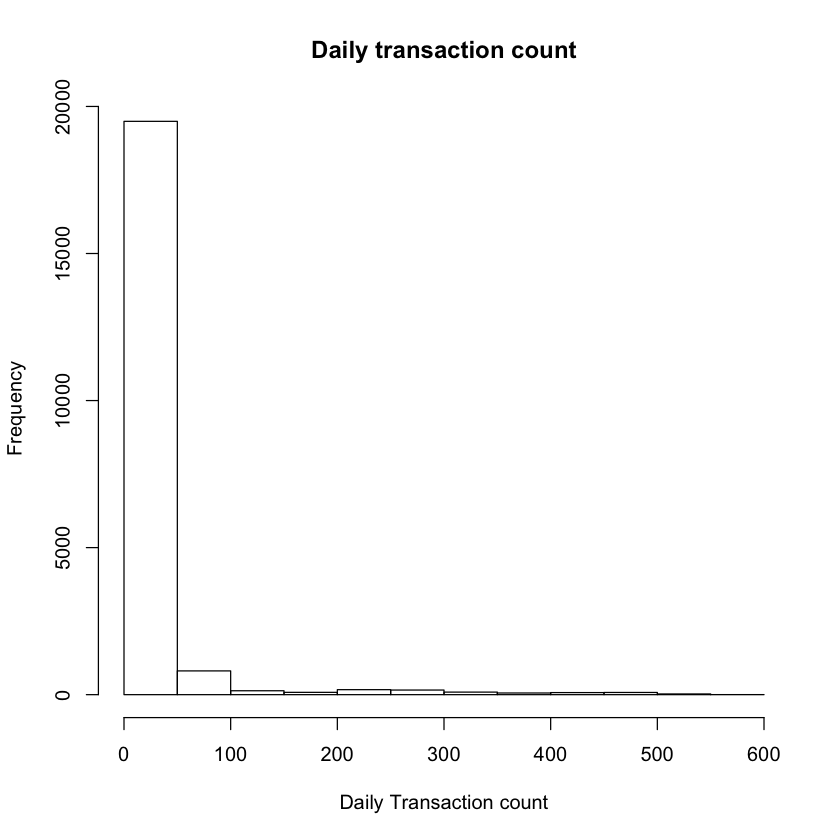

In [51]:
daily_agency_trans =  ccard %>% group_by(Transaction_Date, Agency_Name) %>% 
                        summarize(Daily_Transaction_Count = n())

head(daily_agency_trans,2)

hist(daily_agency_trans$Daily_Transaction_Count, main = 'Daily transaction count', xlab = 'Daily Transaction count')

#### There are a few agencies with over 300 transactions daily, and they might need special focus.

In [52]:
# Merge to data set

ccard = left_join(ccard, daily_agency_trans, by = c("Transaction_Date", "Agency_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Month,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,10,16,Wednesday,Wednesday,NA days,NA days,NA days,NA days,183 days,1
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,07,18,Tuesday,Tuesday,NA days,NA days,NA days,NA days,62 days,1


### `Feature 11`

### Total number of weekly transactions for each Agency

Very popular agencies are more prone to becoming the hosts of fraudulent transactions, as they might not raise alerts on minute suspicious activities.

`summarise()` regrouping output by 'Year', 'Transaction_Week' (override with `.groups` argument)



Year,Transaction_Week,Agency_Name,Weekly_Transaction_Count
2013,16,OKLAHOMA STATE UNIVERSITY,1
2013,18,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,1


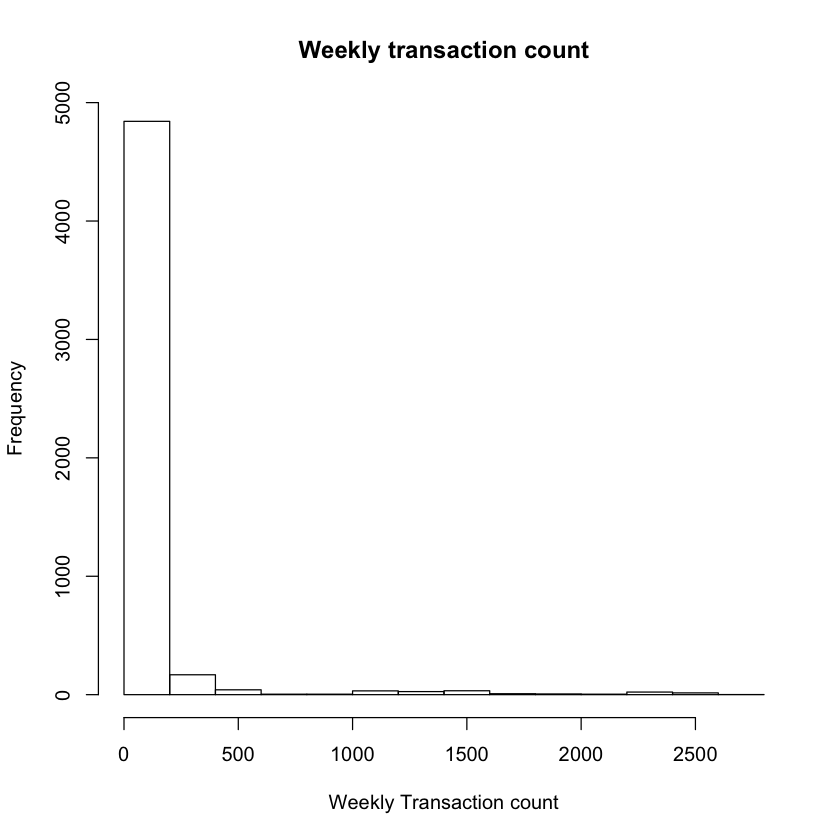

In [53]:
weekly_agency_trans =  ccard %>% group_by(Year, Transaction_Week, Agency_Name) %>% 
                        summarize(Weekly_Transaction_Count = n())

head(weekly_agency_trans,2)

hist(weekly_agency_trans$Weekly_Transaction_Count, main = 'Weekly transaction count', xlab = 'Weekly Transaction count')

#### There are a few agencies with over 1600 transactions weekly, and they might need special focus.

In [54]:
# Merge to data set

ccard = left_join(ccard, weekly_agency_trans, by = c("Year", "Transaction_Week", "Agency_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Transaction_Week,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,16,Wednesday,Wednesday,NA days,NA days,NA days,NA days,183 days,1,1
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,18,Tuesday,Tuesday,NA days,NA days,NA days,NA days,62 days,1,1


### `Feature 12`

### Total number of monthly transactions for each Agency

Very popular agencies are more prone to becoming the hosts of fraudulent transactions, as they might not raise alerts on minute suspicious activities.

`summarise()` regrouping output by 'Year', 'Month' (override with `.groups` argument)



Year,Month,Agency_Name,Monthly_Transaction_Count
2013,07,`DEPARTMENT OF EDUCATION,103
2013,07,ARDMORE HIGHER EDUCATION CENTER,8


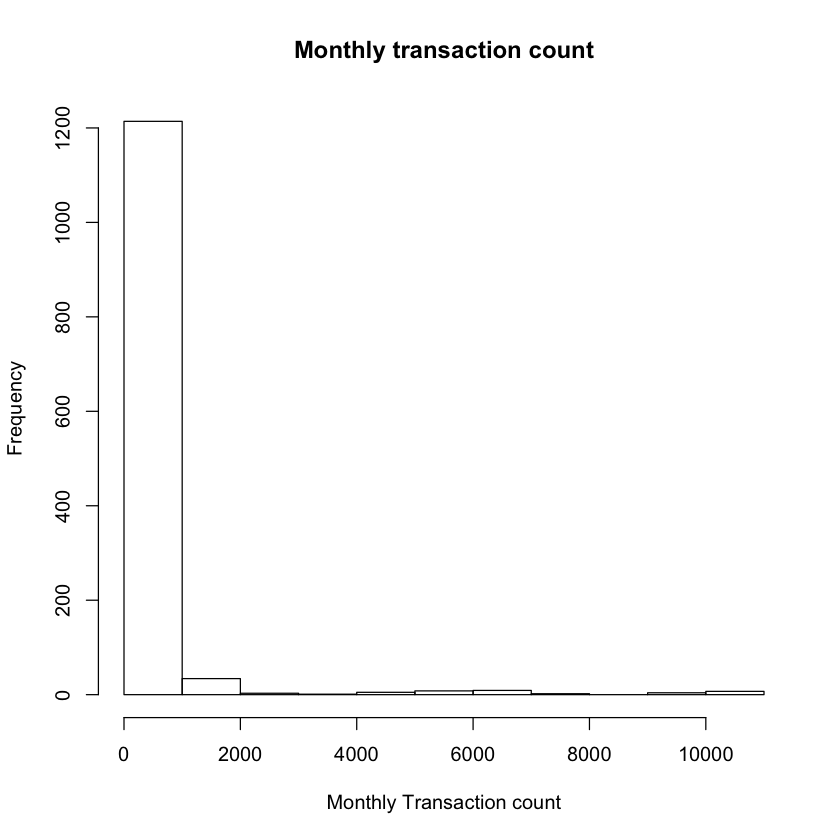

In [55]:
monthly_agency_trans =  ccard %>% group_by(Year, Month, Agency_Name) %>% 
                        summarize(Monthly_Transaction_Count = n())

head(monthly_agency_trans,2)

hist(monthly_agency_trans$Monthly_Transaction_Count, main = 'Monthly transaction count', xlab = 'Monthly Transaction count')

#### There are a few agencies with over 7000 transactions weekly, and they might need special focus.

In [56]:
# Merge to data set

ccard = left_join(ccard, monthly_agency_trans, by = c("Year", "Month", "Agency_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Day_of_Week,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,Wednesday,Wednesday,NA days,NA days,NA days,NA days,183 days,1,1,10763
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,Tuesday,Tuesday,NA days,NA days,NA days,NA days,62 days,1,1,21


### `Feature 13`

### Total number of merchant categories per week by Agency

The merchants with multiple visit will likely to be legit. This provides insight into the less frequented vendors, and those that have not historically been visited would be a red flag. 

`summarise()` regrouping output by 'Year', 'Transaction_Week' (override with `.groups` argument)



Year,Transaction_Week,Agency_Name,Weekly_Merchants
2013,16,OKLAHOMA STATE UNIVERSITY,1
2013,18,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,1


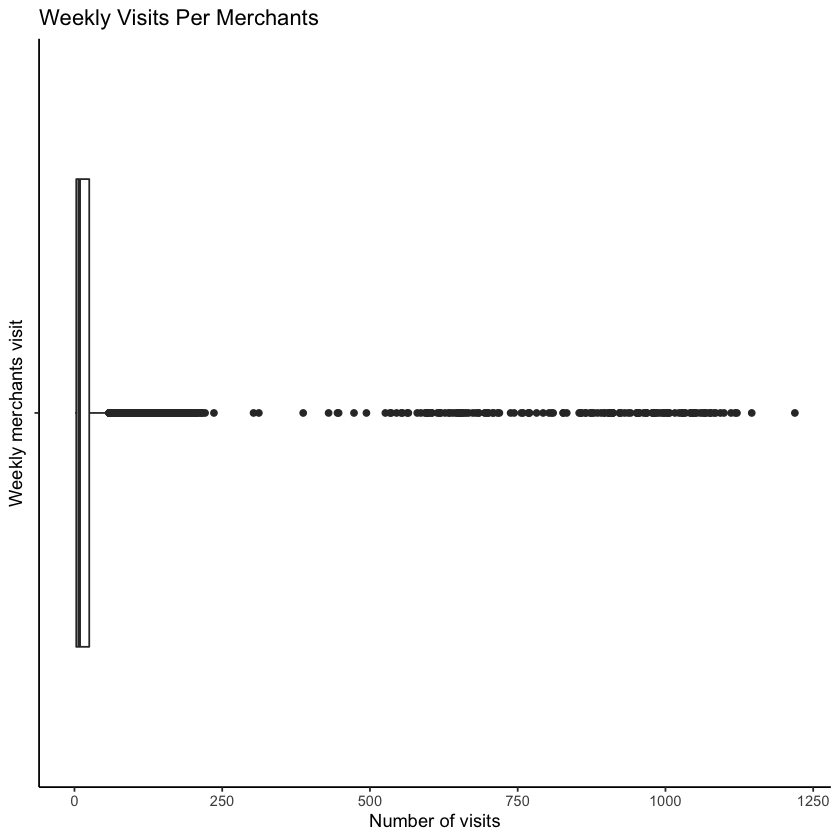

In [57]:
weekly_merchants_by_agency = ccard %>% group_by(Year, Transaction_Week, Agency_Name) %>%
                              summarize(Weekly_Merchants = length(unique(Merchant_Name)))

head(weekly_merchants_by_agency, 2)

ggplot(weekly_merchants_by_agency, aes(x ='', y = Weekly_Merchants)) + 
  geom_boxplot()+ xlab('Weekly merchants visit') + ylab('Number of visits') + 
  theme_classic() + ggtitle('Weekly Visits Per Merchants') + 
  coord_flip()

In [58]:
# Merge to data set

ccard = left_join(ccard, weekly_merchants_by_agency, by = c("Year", "Transaction_Week", "Agency_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Weekday,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,Wednesday,NA days,NA days,NA days,NA days,183 days,1,1,10763,1
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,Tuesday,NA days,NA days,NA days,NA days,62 days,1,1,21,1


### `Feature 14`

### Total number of merchant categories per month by Agency

The merchants with multiple visit will likely to be legit. This provides insight into the less frequented vendors, and those that have not historically been visited would be a red flag. 

`summarise()` regrouping output by 'Year', 'Month' (override with `.groups` argument)



Year,Month,Agency_Name,Monthly_Merchants
2013,07,`DEPARTMENT OF EDUCATION,59
2013,07,ARDMORE HIGHER EDUCATION CENTER,5


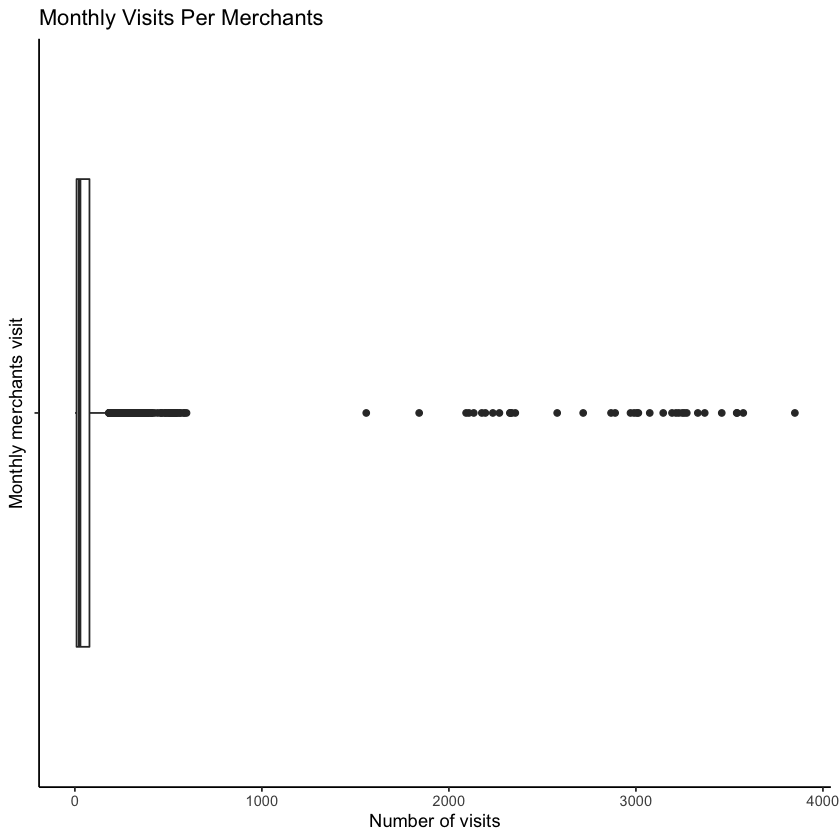

In [59]:
monthly_merchants_by_agency = ccard %>% group_by(Year, Month, Agency_Name) %>%
                              summarize(Monthly_Merchants = length(unique(Merchant_Name)))

head(monthly_merchants_by_agency, 2)

ggplot(monthly_merchants_by_agency, aes(x ='', y = Monthly_Merchants)) + 
  geom_boxplot()+ xlab('Monthly merchants visit') + ylab('Number of visits') + 
  theme_classic() + ggtitle('Monthly Visits Per Merchants') + 
  coord_flip()

In [60]:
# Merge to data set

ccard = left_join(ccard, monthly_merchants_by_agency, by = c("Year", "Month", "Agency_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Days_Since_Last_Ag,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,NA days,NA days,NA days,NA days,183 days,1,1,10763,1,3146
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,NA days,NA days,NA days,NA days,62 days,1,1,21,1,5


### `Feature 15` 

### Total number of transaction per Merchant_Category, day-wise for Agencies

Calculating the total number of transactions per day indicates where to look for fraud at each merchant. The features assume that fraudsters are a big spender and are likely to spend a large amount at each store visit. By isolating and reviewing each incident, the merchant would be able to deduce the credibility of each transaction. 

In [61]:
transactions_by_mer_cat_daywise = ccard %>% group_by(Transaction_Date, Agency_Name, Merchant_Category) %>%
                                        summarize(Daily_Merc_Trans_Day = length(Amount))

head(transactions_by_mer_cat_daywise,2)

`summarise()` regrouping output by 'Transaction_Date', 'Agency_Name' (override with `.groups` argument)



Transaction_Date,Agency_Name,Merchant_Category,Daily_Merc_Trans_Day
2013-04-17,OKLAHOMA STATE UNIVERSITY,COMBINATION CATALOG AND RETAIL MERCHANT,1
2013-04-30,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,DISCOUNT STORES,1


In [62]:
# Merge to data set

ccard = left_join(ccard, transactions_by_mer_cat_daywise, by = c("Transaction_Date", "Agency_Name", "Merchant_Category"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Days_Since_Last_CH,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,NA days,NA days,NA days,183 days,1,1,10763,1,3146,1
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,NA days,NA days,NA days,62 days,1,1,21,1,5,1


### `Feature 16` 

### Maximum number of transaction per Merchant_Category, week-wise for Agencies

Calculating the total number of transactions per week indicates where to look for fraud at each merchant. The features assume that fraudsters are a big spender and are likely to spend a large amount at each store visit. By isolating and reviewing each incident, the merchant would be able to deduce the credibility of each transaction. 

In [63]:
transactions_by_mer_cat_weekwise = ccard %>% group_by(Transaction_Week, Agency_Name, Merchant_Category) %>%
                                        summarize(Daily_Merc_Trans_Week = length(Amount))

head(transactions_by_mer_cat_weekwise,2)

`summarise()` regrouping output by 'Transaction_Week', 'Agency_Name' (override with `.groups` argument)



Transaction_Week,Agency_Name,Merchant_Category,Daily_Merc_Trans_Week
1,`DEPARTMENT OF EDUCATION,"COMMERCIAL PHOTOGRAPHY,ART,AND GRAPHICS",1
1,`DEPARTMENT OF EDUCATION,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFTWARE",3


In [64]:
# Merge to data set

ccard = left_join(ccard, transactions_by_mer_cat_weekwise, by = c("Transaction_Week", "Agency_Name", "Merchant_Category"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Days_Since_Last_Merc,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,NA days,NA days,183 days,1,1,10763,1,3146,1,18
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,NA days,NA days,62 days,1,1,21,1,5,1,1


### `Feature 17` 

### Maximum number of transaction per Merchant_Category, month-wise for Agencies

Calculating the total number of transactions per month indicates where to look for fraud at each merchant. The features assume that fraudsters are a big spender and are likely to spend a large amount at each store visit. By isolating and reviewing each incident, the merchant would be able to deduce the credibility of each transaction. 

In [65]:
transactions_by_mer_cat_monthwise = ccard %>% group_by(Month, Agency_Name, Merchant_Category) %>%
                                        summarize(Daily_Merc_Trans_Month = length(Amount))

head(transactions_by_mer_cat_monthwise,2)

`summarise()` regrouping output by 'Month', 'Agency_Name' (override with `.groups` argument)



Month,Agency_Name,Merchant_Category,Daily_Merc_Trans_Month
01,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,1
01,`DEPARTMENT OF EDUCATION,AMERICAN AIRLINES,6


In [66]:
# Merge to data set

ccard = left_join(ccard, transactions_by_mer_cat_monthwise, by = c("Month", "Agency_Name", "Merchant_Category"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Days_Since_Last_Merc_Cat,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,NA days,183 days,1,1,10763,1,3146,1,18,76
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,NA days,62 days,1,1,21,1,5,1,1,1


## 3. Monetary

### `Feature 18`

### Total amount per cardholder spent daily

This will help understand the spending pattern of every cardholder

`summarise()` regrouping output by 'Transaction_Date' (override with `.groups` argument)



Transaction_Date,Cardholder_Last_Name,Daily_Cardholder_Amount
2013-04-17,Tucker,-34.82
2013-04-30,Hall,-7.00


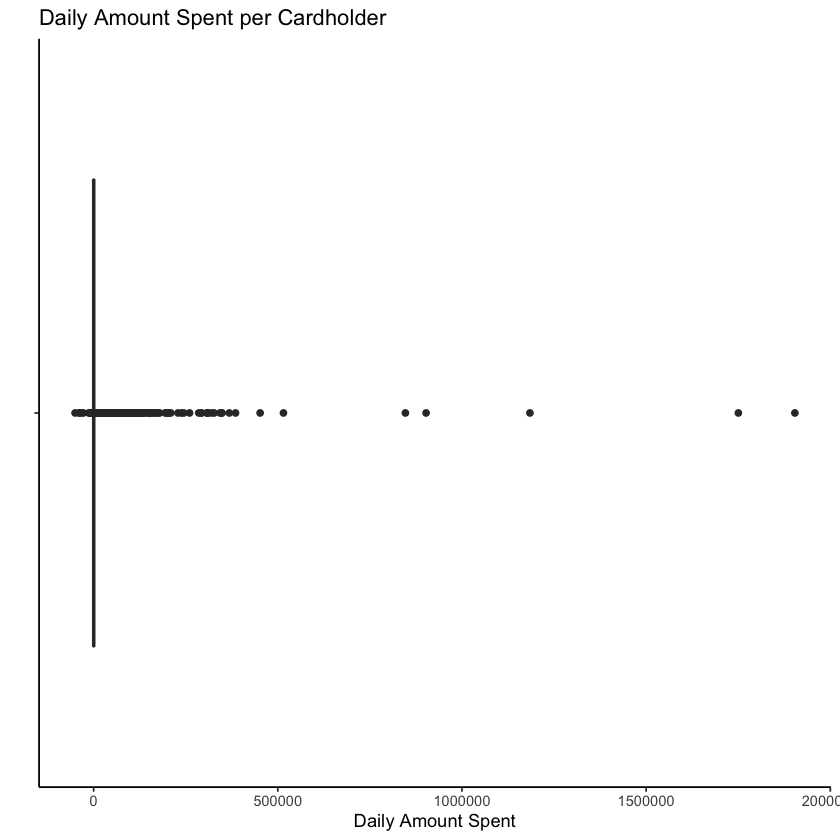

In [67]:
daily_cardholder_amount = ccard %>% group_by(Transaction_Date, Cardholder_Last_Name) %>%
                        summarize(Daily_Cardholder_Amount = sum(Amount))

head(daily_cardholder_amount,2)

ggplot(daily_cardholder_amount, aes(x ='', y = Daily_Cardholder_Amount)) + 
  geom_boxplot() + xlab('') + ylab('Daily Amount Spent') + 
  theme_classic() + ggtitle('Daily Amount Spent per Cardholder') + 
  coord_flip()

In [68]:
ccard = left_join(ccard, daily_cardholder_amount, by = c("Transaction_Date", "Cardholder_Last_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Date_Diff,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,183 days,1,1,10763,1,3146,1,18,76,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,62 days,1,1,21,1,5,1,1,1,-7.00


### `Feature 19`

### Total amount per cardholder spent weekly

This will help understand the spending pattern of every cardholder

`summarise()` regrouping output by 'Year', 'Transaction_Week' (override with `.groups` argument)



Year,Transaction_Week,Cardholder_Last_Name,Weekly_Cardholder_Amount
2013,16,Tucker,-34.82
2013,18,Hall,-7.00


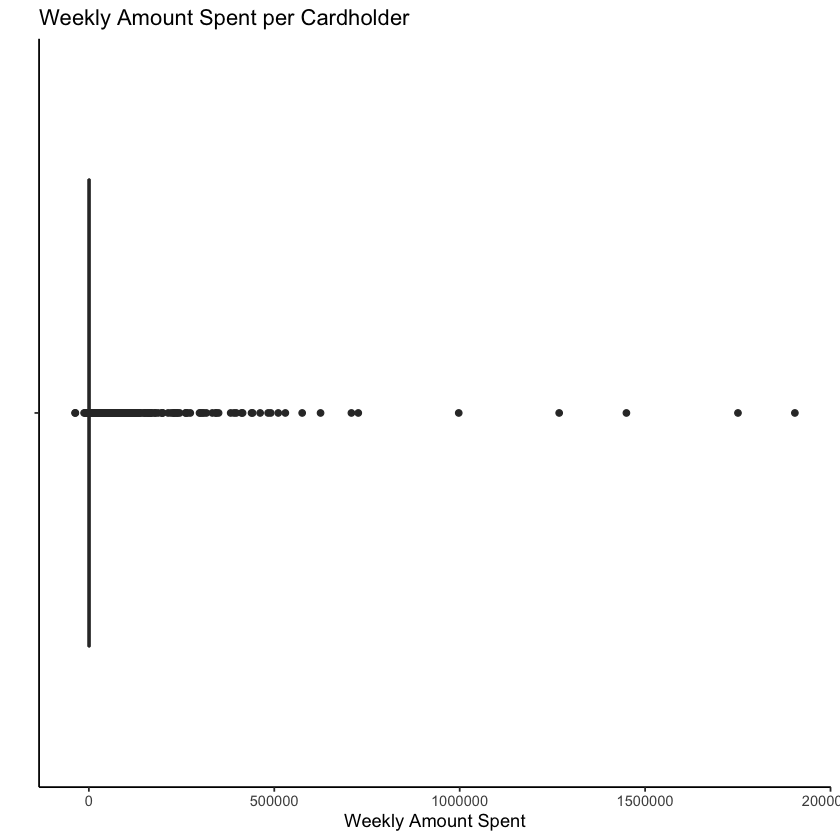

In [69]:
weekly_cardholder_amount = ccard %>% group_by(Year, Transaction_Week, Cardholder_Last_Name) %>%
                        summarize(Weekly_Cardholder_Amount = sum(Amount))

head(weekly_cardholder_amount,2)

ggplot(weekly_cardholder_amount, aes(x ='', y = Weekly_Cardholder_Amount)) + 
  geom_boxplot() + xlab('') + ylab('Weekly Amount Spent') + 
  theme_classic() + ggtitle('Weekly Amount Spent per Cardholder') + 
  coord_flip()

In [70]:
ccard = left_join(ccard, weekly_cardholder_amount, by = c("Year", "Transaction_Week", "Cardholder_Last_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Daily_Transaction_Count,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,1,1,10763,1,3146,1,18,76,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1,1,21,1,5,1,1,1,-7.00,-7.00


### `Feature 20`

### Total amount per cardholder spent montly

This will help understand the spending pattern of every cardholder

`summarise()` regrouping output by 'Year', 'Month' (override with `.groups` argument)



Year,Month,Cardholder_Last_Name,Monthly_Cardholder_Amount
2013,07,24100,1812.99
2013,07,42000,1.17


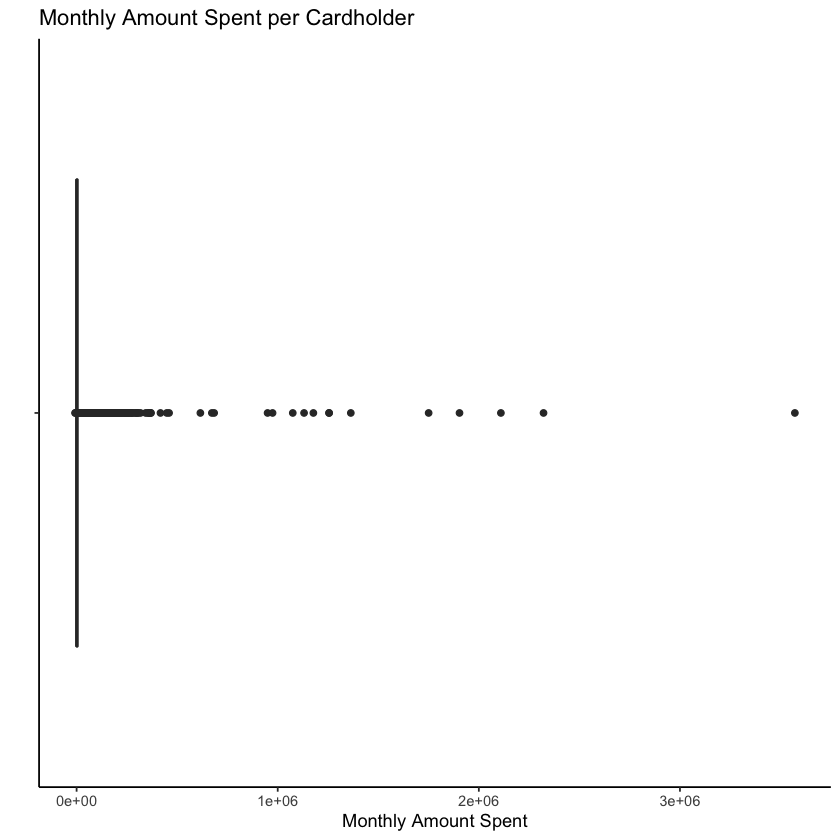

In [71]:
monthly_cardholder_amount = ccard %>% group_by(Year, Month, Cardholder_Last_Name) %>%
                        summarize(Monthly_Cardholder_Amount = sum(Amount))

head(monthly_cardholder_amount,2)

ggplot(monthly_cardholder_amount, aes(x ='', y = Monthly_Cardholder_Amount)) + 
  geom_boxplot() + xlab('') + ylab('Monthly Amount Spent') + 
  theme_classic() + ggtitle('Monthly Amount Spent per Cardholder') + 
  coord_flip()

In [72]:
ccard = left_join(ccard, monthly_cardholder_amount, by = c("Year", "Month", "Cardholder_Last_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Weekly_Transaction_Count,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,1,10763,1,3146,1,18,76,-34.82,-34.82,11687.28
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1,21,1,5,1,1,1,-7.00,-7.00,1280.86


### `Feature 21`

### Weekly Merchant Revenue given by Agencies

The weekly spend by the agencies overall will give the names for the top merchants as well as the general weekly spend of the entire agency. 

It is to note that merchants who have a very amount of revenues may be more prone to frauds.

`summarise()` regrouping output by 'Year', 'Transaction_Week' (override with `.groups` argument)



Year,Transaction_Week,Merchant_Name,Weekly_Merchant_Revenue
2013,16,UNIVERSITEIT GENT,-34.82
2013,18,CREDIT PURCHASE BALANCE,-7.00


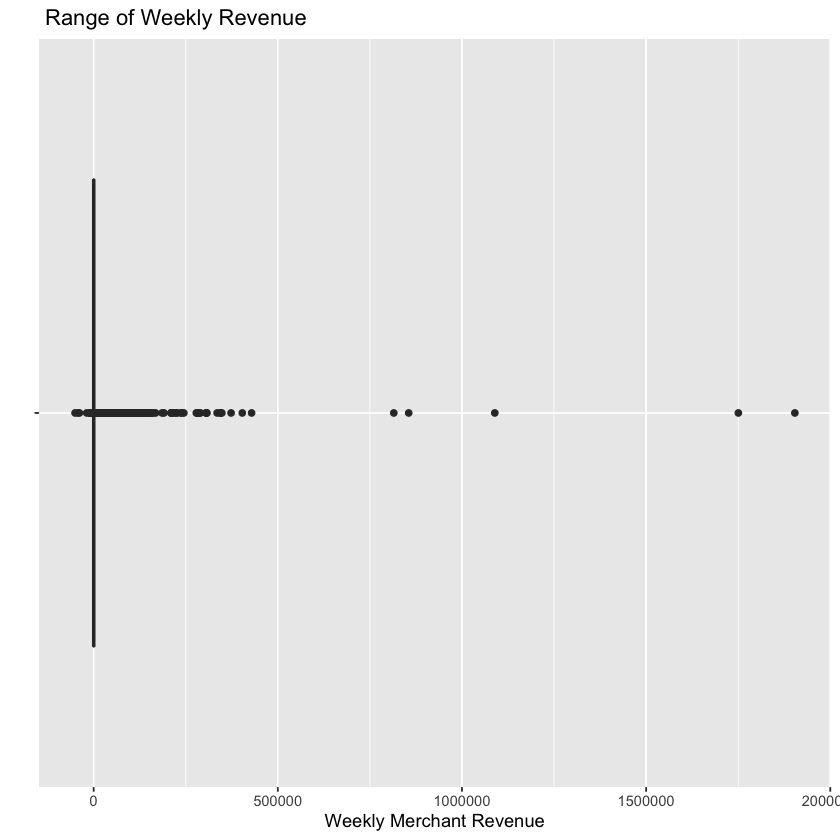

In [73]:
weekly_merchant_rev =  ccard %>% group_by(Year, Transaction_Week, Merchant_Name) %>% 
                                summarize(Weekly_Merchant_Revenue = sum(Amount))

head(weekly_merchant_rev,2)

ggplot(weekly_merchant_rev, aes(x = '', y = Weekly_Merchant_Revenue)) + 
  geom_boxplot() + ggtitle(' Range of Weekly Revenue') + coord_flip() + 
  xlab('') + ylab('Weekly Merchant Revenue')

In [74]:
ccard = left_join(ccard, weekly_merchant_rev, by = c("Year", "Transaction_Week", "Merchant_Name"))
head(ccard,2)

# Checks
sum(is.na(ccard))

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Monthly_Transaction_Count,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,10763,1,3146,1,18,76,-34.82,-34.82,11687.28,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,21,1,5,1,1,1,-7.00,-7.00,1280.86,-7.00


[1] 91199

### `Feature 22`

### Monthly Merchant Revenue given by Agencies

The monthly spend by the agencies overall will give the names for the top merchants as well as the general weekly spend of the entire agency. 

It is to note that merchants who have a very amount of revenues may be more prone to frauds.

`summarise()` regrouping output by 'Year', 'Month' (override with `.groups` argument)



Year,Month,Merchant_Name,Monthly_Merchant_Revenue
2013,07,003 CENTURYLINK MY ACCOUN,130.88
2013,07,108 AUTO & TRUCK SALVAGE,50.00


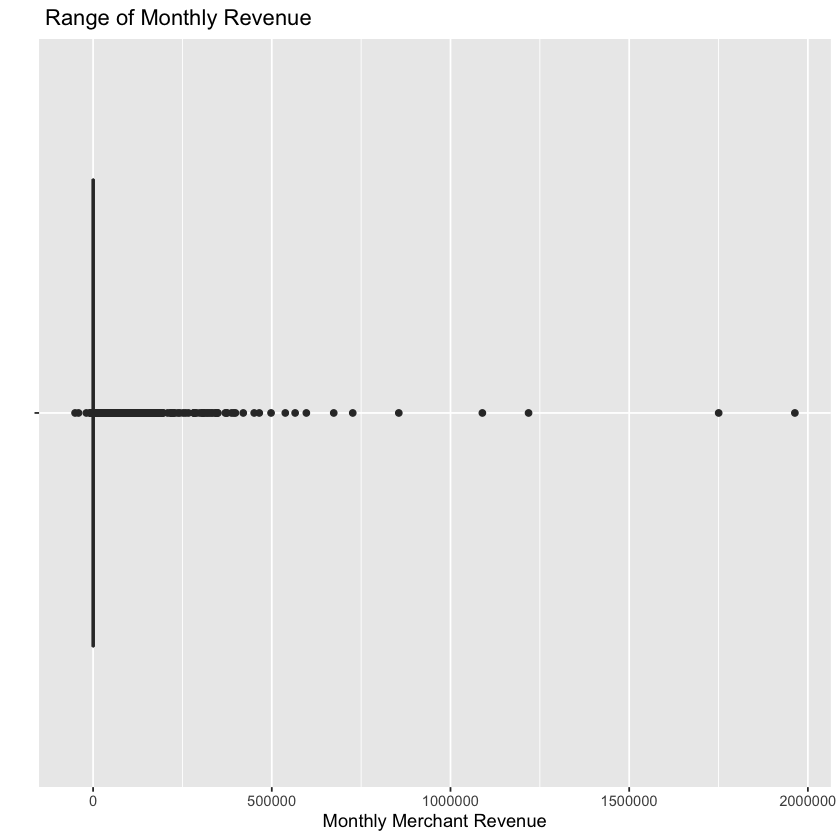

In [75]:
monthly_merchant_rev =  ccard %>% group_by(Year, Month, Merchant_Name) %>% 
                                summarize(Monthly_Merchant_Revenue = sum(Amount))

head(monthly_merchant_rev,2)

ggplot(monthly_merchant_rev, aes(x = '', y = Monthly_Merchant_Revenue)) + 
  geom_boxplot() + ggtitle(' Range of Monthly Revenue') + coord_flip() + 
  xlab('') + ylab('Monthly Merchant Revenue')

In [76]:
ccard = left_join(ccard, monthly_merchant_rev, by = c("Year", "Month", "Merchant_Name"))
head(ccard,2)

# Checks
sum(is.na(ccard))

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Weekly_Merchants,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,1,3146,1,18,76,-34.82,-34.82,11687.28,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1,5,1,1,1,-7.00,-7.00,1280.86,-7.00,-7.00


[1] 91199

### `Feature 23`

### Mean amount spent by Merchant Category, by Agency, per day

In [77]:
mean_by_agency_merchant_cat_day = ccard %>% group_by(Year, Agency_Name, Merchant_Category, Transaction_Date) %>%
    summarise(Mean_Amount_Merchant_Cat_Per_Day_Ag = sum(Amount))

head(mean_by_agency_merchant_cat_day,2)

`summarise()` regrouping output by 'Year', 'Agency_Name', 'Merchant_Category' (override with `.groups` argument)



Year,Agency_Name,Merchant_Category,Transaction_Date,Mean_Amount_Merchant_Cat_Per_Day_Ag
2013,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,2013-06-29,415.85
2013,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,2013-07-01,96.14


In [78]:
ccard = left_join(ccard, mean_by_agency_merchant_cat_day, by = c("Year", "Agency_Name", "Merchant_Category", "Transaction_Date"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Monthly_Merchants,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,3146,1,18,76,-34.82,-34.82,11687.28,-34.82,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,5,1,1,1,-7.00,-7.00,1280.86,-7.00,-7.00,-7.00


### `Feature 24`

### Mean amount spent by Merchant Category, by Agency, per week

In [79]:
mean_by_agency_merchant_cat_week = ccard %>% group_by(Year, Agency_Name, Merchant_Category, Transaction_Week) %>%
    summarise(Mean_Amount_Merchant_Cat_Per_Week_Ag = sum(Amount))

head(mean_by_agency_merchant_cat_week,2)

`summarise()` regrouping output by 'Year', 'Agency_Name', 'Merchant_Category' (override with `.groups` argument)



Year,Agency_Name,Merchant_Category,Transaction_Week,Mean_Amount_Merchant_Cat_Per_Week_Ag
2013,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,26,511.99
2013,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,28,753.68


In [80]:
ccard = left_join(ccard, mean_by_agency_merchant_cat_week, by = c("Year", "Agency_Name", "Merchant_Category", "Transaction_Week"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Daily_Merc_Trans_Day,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,1,18,76,-34.82,-34.82,11687.28,-34.82,-34.82,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1,1,1,-7.00,-7.00,1280.86,-7.00,-7.00,-7.00,-7.00


### `Feature 25`

### Mean amount spent by Merchant Category, by Agency, per month

In [81]:
mean_by_agency_merchant_cat_month = ccard %>% group_by(Year, Agency_Name, Merchant_Category, Month) %>%
    summarise(Mean_Amount_Merchant_Cat_PerMonth_Ag = sum(Amount))

head(mean_by_agency_merchant_cat_month,2)

`summarise()` regrouping output by 'Year', 'Agency_Name', 'Merchant_Category' (override with `.groups` argument)



Year,Agency_Name,Merchant_Category,Month,Mean_Amount_Merchant_Cat_PerMonth_Ag
2013,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,07,1265.67
2013,`DEPARTMENT OF EDUCATION,ADVERTISING SERVICES,08,38.12


In [82]:
ccard = left_join(ccard, mean_by_agency_merchant_cat_month, by = c("Year", "Agency_Name", "Merchant_Category", "Month"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Daily_Merc_Trans_Week,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,18,76,-34.82,-34.82,11687.28,-34.82,-34.82,-34.82,-34.82,5486.02
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1,1,-7.00,-7.00,1280.86,-7.00,-7.00,-7.00,-7.00,-7.00


### `Feature 26`

### Mean amount spent by Agency per day

In [83]:
mean_amount_day_agency = ccard %>% group_by(Year, Agency_Name, Transaction_Date) %>%
                            summarise(Mean_Amount_Per_Day_Ag = mean(Amount))

head(mean_amount_day_agency,2)

`summarise()` regrouping output by 'Year', 'Agency_Name' (override with `.groups` argument)



Year,Agency_Name,Transaction_Date,Mean_Amount_Per_Day_Ag
2013,`DEPARTMENT OF EDUCATION,2013-06-29,415.85
2013,`DEPARTMENT OF EDUCATION,2013-07-01,82.07


In [84]:
ccard = left_join(ccard, mean_amount_day_agency, by = c("Year", "Agency_Name", "Transaction_Date"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Daily_Merc_Trans_Month,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,76,-34.82,-34.82,11687.28,-34.82,-34.82,-34.82,-34.82,5486.02,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1,-7.00,-7.00,1280.86,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00


### `Feature 27`

### Mean amount spent by Agency per week

In [85]:
mean_amount_week_agency = ccard %>% group_by(Year, Agency_Name, Transaction_Week) %>%
                            summarise(Mean_Amount_Per_Week_Ag = mean(Amount))

head(mean_amount_week_agency,2)

`summarise()` regrouping output by 'Year', 'Agency_Name' (override with `.groups` argument)



Year,Agency_Name,Transaction_Week,Mean_Amount_Per_Week_Ag
2013,`DEPARTMENT OF EDUCATION,26,193.3300
2013,`DEPARTMENT OF EDUCATION,27,327.2827


In [86]:
ccard = left_join(ccard, mean_amount_week_agency, by = c("Year", "Agency_Name", "Transaction_Week"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Daily_Cardholder_Amount,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag,Mean_Amount_Per_Week_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,-34.82,-34.82,11687.28,-34.82,-34.82,-34.82,-34.82,5486.02,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,-7.00,-7.00,1280.86,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00


### `Feature 28`

### Mean amount spent by Agency per month

In [87]:
mean_amount_month_agency = ccard %>% group_by(Year, Agency_Name, Month) %>%
                            summarise(Mean_Amount_Per_Month_Ag = mean(Amount))

head(mean_amount_month_agency,2)

`summarise()` regrouping output by 'Year', 'Agency_Name' (override with `.groups` argument)



Year,Agency_Name,Month,Mean_Amount_Per_Month_Ag
2013,`DEPARTMENT OF EDUCATION,07,311.6752
2013,`DEPARTMENT OF EDUCATION,08,316.3614


In [88]:
ccard = left_join(ccard, mean_amount_month_agency, by = c("Year", "Agency_Name", "Month"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Weekly_Cardholder_Amount,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag,Mean_Amount_Per_Week_Ag,Mean_Amount_Per_Month_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,-34.82,11687.28,-34.82,-34.82,-34.82,-34.82,5486.02,-34.82,-34.82,282.58266
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,-7.00,1280.86,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,22.93952


### `Feature 29` 
### Maximum amount spent per merchant category, by Agency, per week

In [89]:
max_amount_week_merchant_cat_ag = ccard %>% group_by(Year, Transaction_Week, Agency_Name, Merchant_Category) %>%
                            summarise(Max_Amount_Per_Week_Merc_Cat_Ag = max(Amount))

head(max_amount_week_merchant_cat_ag,2)

`summarise()` regrouping output by 'Year', 'Transaction_Week', 'Agency_Name' (override with `.groups` argument)



Year,Transaction_Week,Agency_Name,Merchant_Category,Max_Amount_Per_Week_Merc_Cat_Ag
2013,16,OKLAHOMA STATE UNIVERSITY,COMBINATION CATALOG AND RETAIL MERCHANT,-34.82
2013,18,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,DISCOUNT STORES,-7.00


In [90]:
ccard = left_join(ccard, max_amount_week_merchant_cat_ag, by = c("Year", "Transaction_Week", "Agency_Name", "Merchant_Category"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Monthly_Cardholder_Amount,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag,Mean_Amount_Per_Week_Ag,Mean_Amount_Per_Month_Ag,Max_Amount_Per_Week_Merc_Cat_Ag
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,11687.28,-34.82,-34.82,-34.82,-34.82,5486.02,-34.82,-34.82,282.58266,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,1280.86,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,22.93952,-7.00


### `Feature 30` 

### Maximum daily amount spent per cardholder

I assume that frauders are high spenders. This allows agency to review the maximun spent by a cardholder on a given day, and further investigate its credibility. 

In [91]:
max_daily_cardholder_spend = ccard %>% group_by(Transaction_Date, Cardholder_Last_Name) %>% 
                                summarize(Max_Daily_Cardholder_Spend = max(Amount))

head(max_daily_cardholder_spend,2)

`summarise()` regrouping output by 'Transaction_Date' (override with `.groups` argument)



Transaction_Date,Cardholder_Last_Name,Max_Daily_Cardholder_Spend
2013-04-17,Tucker,-34.82
2013-04-30,Hall,-7.00


In [92]:
ccard = left_join(ccard, max_daily_cardholder_spend, by = c("Transaction_Date", "Cardholder_Last_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Weekly_Merchant_Revenue,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag,Mean_Amount_Per_Week_Ag,Mean_Amount_Per_Month_Ag,Max_Amount_Per_Week_Merc_Cat_Ag,Max_Daily_Cardholder_Spend
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,-34.82,-34.82,-34.82,-34.82,5486.02,-34.82,-34.82,282.58266,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,22.93952,-7.00,-7.00


### `Feature 31` 

### Maximum weekly amount spent per cardholder

I assume that frauders are high spenders. This allows agency to review the maximun spent by a cardholder on a given day, and further investigate its credibility. 

In [93]:
max_weekly_cardholder_spend = ccard %>% group_by(Year, Transaction_Week, Cardholder_Last_Name) %>% 
                                summarize(Max_Weekly_Cardholder_Spend = max(Amount))

head(max_weekly_cardholder_spend,2)

`summarise()` regrouping output by 'Year', 'Transaction_Week' (override with `.groups` argument)



Year,Transaction_Week,Cardholder_Last_Name,Max_Weekly_Cardholder_Spend
2013,16,Tucker,-34.82
2013,18,Hall,-7.00


In [94]:
ccard = left_join(ccard, max_weekly_cardholder_spend, by = c("Year", "Transaction_Week", "Cardholder_Last_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Monthly_Merchant_Revenue,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag,Mean_Amount_Per_Week_Ag,Mean_Amount_Per_Month_Ag,Max_Amount_Per_Week_Merc_Cat_Ag,Max_Daily_Cardholder_Spend,Max_Weekly_Cardholder_Spend
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,-34.82,-34.82,-34.82,5486.02,-34.82,-34.82,282.58266,-34.82,-34.82,-34.82
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,-7.00,-7.00,-7.00,-7.00,-7.00,-7.00,22.93952,-7.00,-7.00,-7.00


### `Feature 32` 

### Maximum monthly amount spent per cardholder

I assume that frauders are high spenders. This allows agency to review the maximun spent by a cardholder on a given day, and further investigate its credibility. 

In [95]:
max_monthly_cardholder_spend = ccard %>% group_by(Year, Month, Cardholder_Last_Name) %>% 
                                summarize(Max_Monthly_Cardholder_Spend = max(Amount))

head(max_monthly_cardholder_spend,2)

`summarise()` regrouping output by 'Year', 'Month' (override with `.groups` argument)



Year,Month,Cardholder_Last_Name,Max_Monthly_Cardholder_Spend
2013,07,24100,1796.09
2013,07,42000,1.17


In [96]:
ccard = left_join(ccard, max_monthly_cardholder_spend, by = c("Year", "Month", "Cardholder_Last_Name"))
head(ccard,2)

Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Merchant_Name,Transaction_Date,Posted_Date,Merchant_Category,...,Mean_Amount_Merchant_Cat_Per_Day_Ag,Mean_Amount_Merchant_Cat_Per_Week_Ag,Mean_Amount_Merchant_Cat_PerMonth_Ag,Mean_Amount_Per_Day_Ag,Mean_Amount_Per_Week_Ag,Mean_Amount_Per_Month_Ag,Max_Amount_Per_Week_Merc_Cat_Ag,Max_Daily_Cardholder_Spend,Max_Weekly_Cardholder_Spend,Max_Monthly_Cardholder_Spend
1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,...,-34.82,-34.82,5486.02,-34.82,-34.82,282.58266,-34.82,-34.82,-34.82,1395.15
63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,...,-7.00,-7.00,-7.00,-7.00,-7.00,22.93952,-7.00,-7.00,-7.00,413.97
